# AML Project 2 - Regression

Problem Statement :  The objective of the project is to build predictive model to analyze and predict the productivity performance of the employees in the garment factory

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
#numpy, scipy, pandas, seaborn and sklearn package versions used throughout the project1
print('numpy:', np.__version__)
print('seaborn:', sns.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sklearn.__version__)
print('tensorflow:', tf.__version__)
print('keras', keras.__version__)

numpy: 1.19.5
seaborn: 0.11.2
pandas: 1.3.4
sklearn: 0.24.2
tensorflow: 2.7.0
keras 2.7.0


# Data Exploration

In [3]:
df_reg = pd.read_csv("garments_worker_productivity.csv")

In [4]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Feature data types breakdown :
       
    Float features : 6
    Integer features : 5
    String features : 4 

In [5]:
df_reg.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Missing Values

In [6]:
df_reg.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

# Exploratory Data Analysis

In [7]:
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(12, 6))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

Text(0.5, 1.0, 'Work in Progress Histogram')

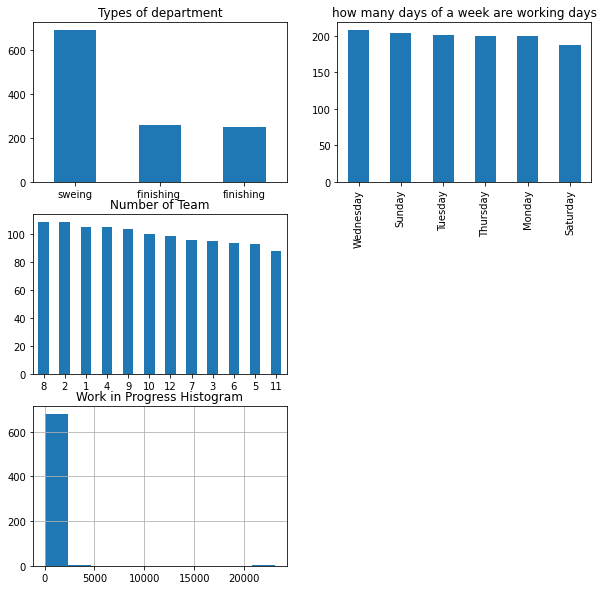

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot department count
plt.subplot2grid(fig_dims, (0, 0))
df_reg['department'].value_counts().plot(kind='bar', 
                                         title='Types of department')
plt.xticks(rotation=0)

# Plot day of the week count
plt.subplot2grid(fig_dims, (0, 1))
df_reg['day'].value_counts().plot(kind='bar', 
                                       title='how many days of a week are working days')
#plt.xticks(rotation=0)

# Plot team count
plt.subplot2grid(fig_dims, (1, 0))
df_reg['team'].value_counts().plot(kind='bar', 
                                    title='Number of Team')
plt.xticks(rotation=0)


# Plot standard minute value histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['smv'].hist()
plt.title('standard minute value Histogram')

# Plot Actual Productivity histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['actual_productivity'].hist()
plt.title('Actual Productivity Histogram')


# Plot wip histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['wip'].hist()
plt.title('Work in Progress Histogram')

# Feature 1 : 'date' [Date in MM-DD-YYYY]

In [9]:
df_reg['date'].unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

# Feature 2 : 'day' [Day of the Week]

In [10]:
df_reg['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday')])

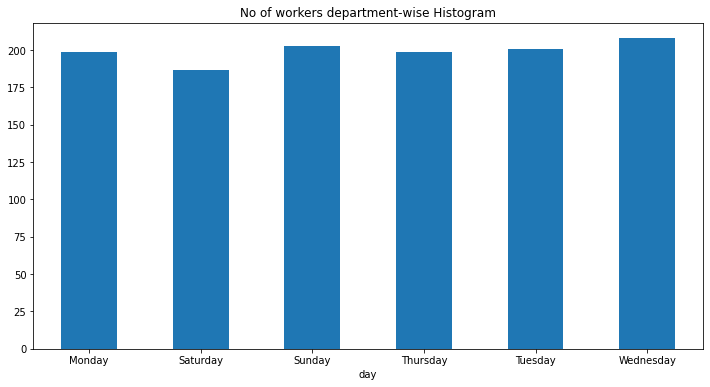

In [11]:
df_reg.groupby('day').count()['no_of_workers'].plot(kind = 'bar',  
                                                         title = 'No of workers department-wise Histogram')
plt.xticks(rotation=0)

# Feature 3 : 'quarter' 

The feature 'quarter' represents a portion of the month. A month was divided into four quarters

In [12]:
df_reg['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

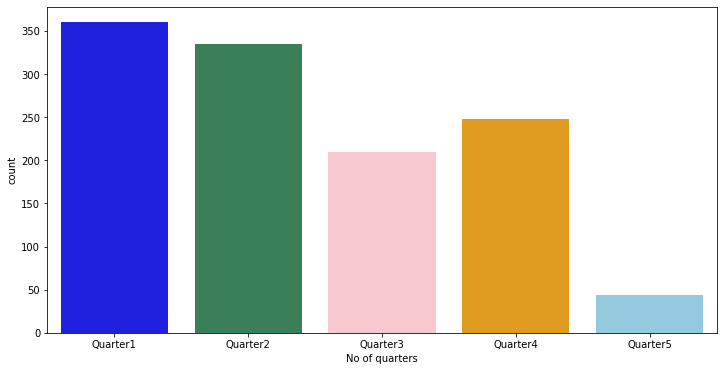

In [13]:
quarter_count = sns.countplot(x = 'quarter', data = df_reg, palette=["blue", "seagreen", "pink","orange", "skyblue"])
plt.xlabel('No of quarters')
plt.show()

# Feature 4 : 'department' [Associated department with the instance]

The feature 'department' represents an associated department with the instance.

In [14]:
df_reg['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [15]:
# Spelling correction : 'sweing' to 'sewing'
df_reg['department']=df_reg['department'].replace(['sweing'],['sewing'])

(array([0, 1, 2]),
 [Text(0, 0, 'finishing'), Text(1, 0, 'finishing '), Text(2, 0, 'sewing')])

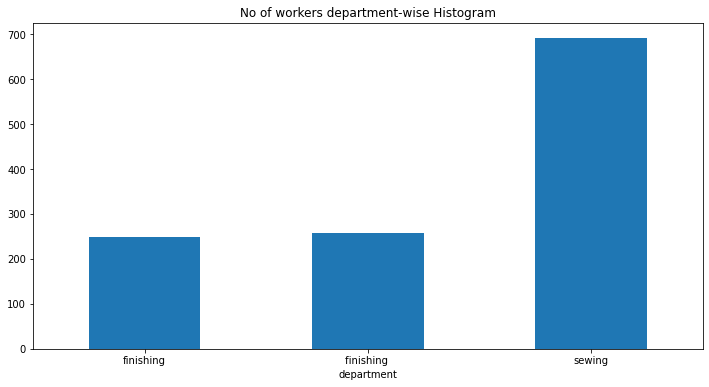

In [16]:
df_reg.groupby('department').count()['no_of_workers'].plot(kind = 'bar',  
                                                         title = 'No of workers department-wise Histogram')
plt.xticks(rotation=0)

There are 3 department namely 'sewing', 'finishing' and 'finishing ', we will use 'finishing ' for our null value
handling and finally prepare 2 distinct groups of 'sewing', 'finishing' later on...


# Feature 5 : 'team' 

The feature 'teamno' represents an associated team number with the instance.

In [17]:
df_reg['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

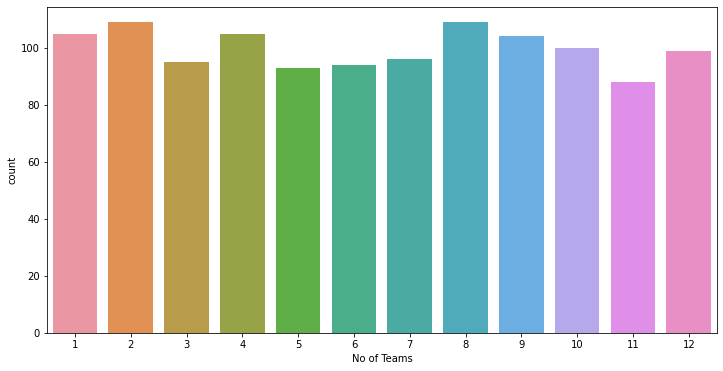

In [18]:
team_count = sns.countplot(x = 'team', data = df_reg)
plt.xlabel('No of Teams')
plt.show()

# Feature 6 : 'no_of_workers' 

The feature 'no_of_workers' represents the Number of workers in each team.

<AxesSubplot:>

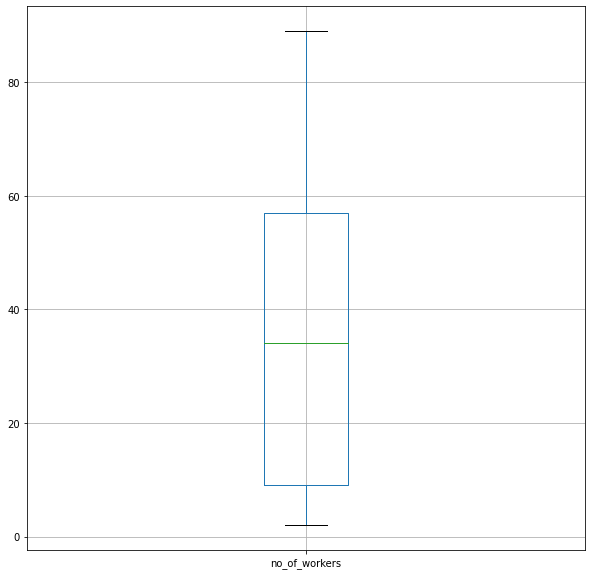

In [19]:
df_reg.boxplot(column=['no_of_workers'],figsize=(10,10))

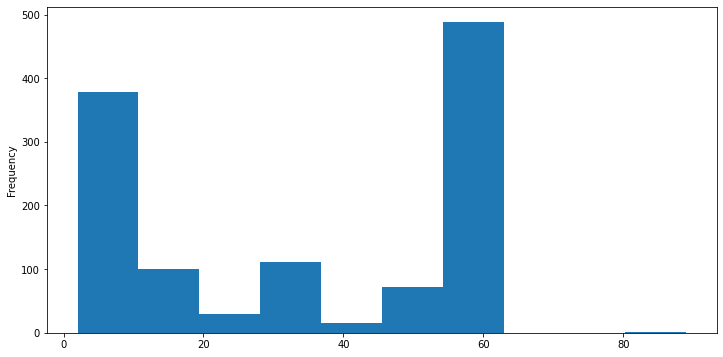

In [20]:
df_reg['no_of_workers'].plot(kind='hist')
plt.show()

# Feature 7 : 'no_of_stylechange' 

The feature 'no_of_stylechange' represents the Number of changes in the style of a particular product.

In [21]:
df_reg['no_of_style_change'].unique()

array([0, 1, 2])

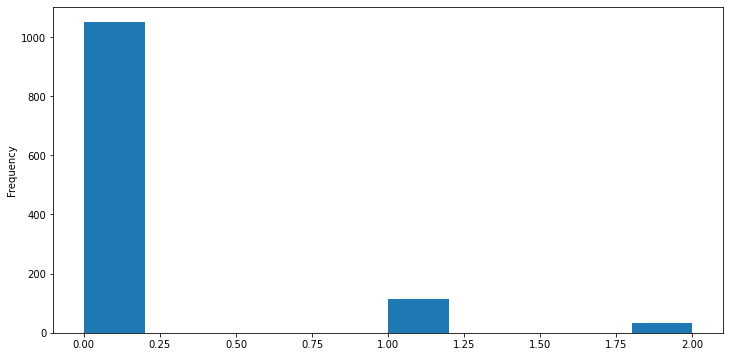

In [22]:
df_reg['no_of_style_change'].plot(kind='hist')
plt.show()

# Feature 8 : 'targeted_productivity' 

The feature 'targeted_productivity'represents argeted productivity set by the Authority for each team for each day.

<AxesSubplot:>

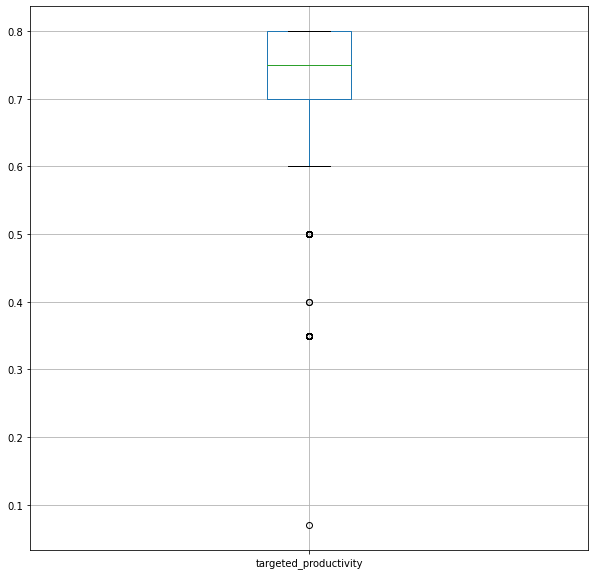

In [23]:
df_reg.boxplot(column=['targeted_productivity'],figsize=(10,10))

Observaion : Targeted productivity tends to inflate more beyond 70%

# Feature 9 : 'smv' 

The feature 'smv' represents Standard Minute Value, it is the allocated time for a task.

<AxesSubplot:>

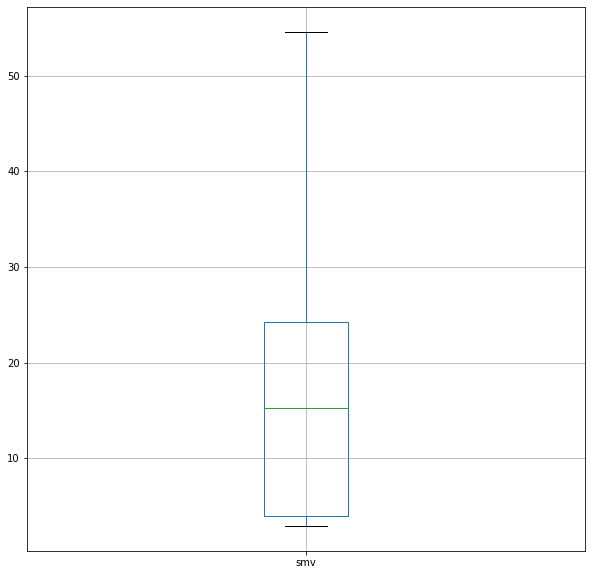

In [24]:
df_reg.boxplot(column=['smv'],figsize=(10,10))

Observation : Overall average allocated time for a single task is more than 15 minutes

# Feature 10 : 'wip' 

The feature 'wip'  as Work in progress. Includes the number of unfinished items for products.

<AxesSubplot:>

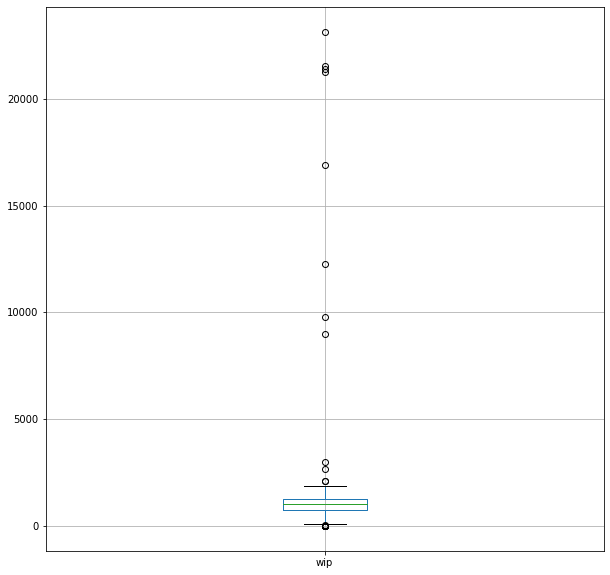

In [25]:
df_reg.boxplot(column=['wip'],figsize=(10,10))

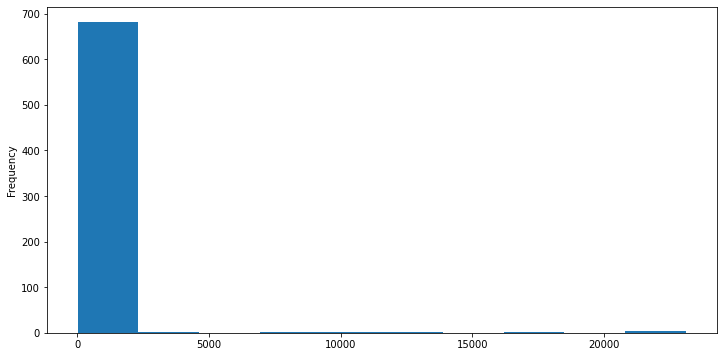

In [26]:
df_reg['wip'].plot(kind='hist')
plt.show()

# Feature 11 : 'overtime' 

The feature 'overtime' represents the amount of overtime by each team in minutes.

In [27]:
df_reg['over_time'].unique()

array([ 7080,   960,  3660,  1920,  6720,  6900,  6000,  6480,  2160,
        7200,  1440,  6600,  5640,  1560,  6300,  6540, 13800,  6975,
        7020,  6780,  4260,  6660,  4320,  6960,  2400,  3840,  4800,
        4440,  1800,  2700, 10620, 10350,  9900,  5310, 10170,  4470,
       10530, 10440,  5490,  5670,  9720, 12600, 10050, 15120, 14640,
         900, 25920, 10260,  2760,  4710,  9540,  7680,  3600,  6420,
        7980,  3240,  8220,  6930,  8460,  7350,  5400,  1620,  1980,
        2970,  7320,  5100,  3390,  1260,  3420,  8970,  4950, 10080,
        9810,  6570,  5040,  4380,  3630,  8280,  6120,  5580,  3720,
        5760,  7470, 10500,  6360,  4140,  8400, 12180,  9000, 15000,
       10770, 12000,  9360,  3060,  2520,   720,  3780, 10320,   360,
        6840,  1080,  1200,  4080,   240,  5880,  6240,  4200,  3960,
         600,  2280,  5940,  1320,  5460,  2040,  4020,  3000,  3360,
        5820,  6060,  2640,  7500,  2880,   120,  3300,     0,  3480,
        7380,  4560,

<AxesSubplot:>

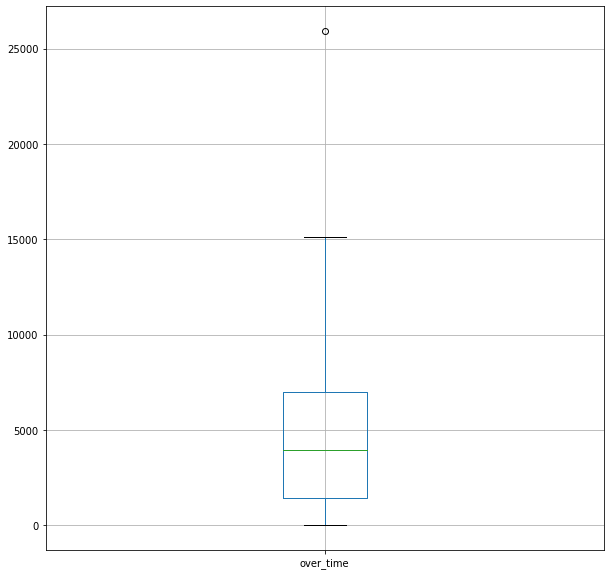

In [28]:
df_reg.boxplot(column=['over_time'],figsize=(10,10))

# Feature 12 : 'incentive' 

The feature 'incentive' represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

<AxesSubplot:>

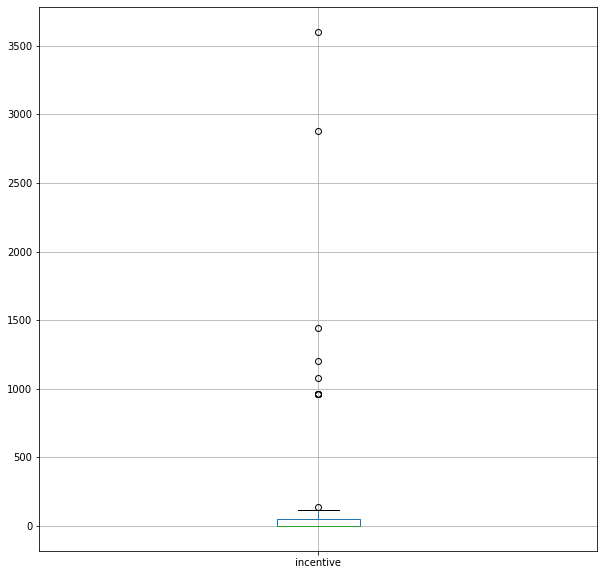

In [29]:
df_reg.boxplot(column=['incentive'],figsize=(10,10))

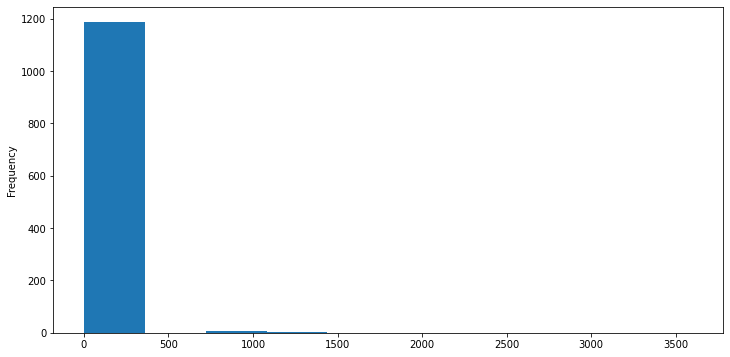

In [30]:
df_reg['incentive'].plot(kind='hist')
plt.show()

Observation : There are a few high incentives involved. May be those speicific high incentive tasks
belong to a particular department and team. We will see it soon!

# Feature 13 : 'idle_time' 

The feature'idle_time' represents the amount of time when the production was interrupted due to several reasons.

<AxesSubplot:>

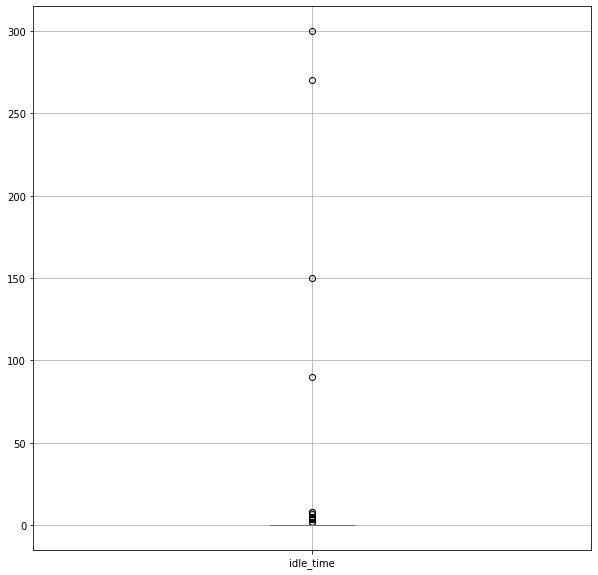

In [31]:
df_reg.boxplot(column=['idle_time'],figsize=(10,10))

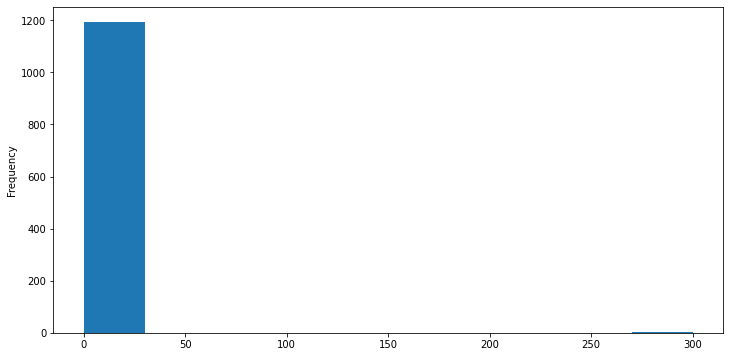

In [32]:
df_reg['idle_time'].plot(kind='hist')
plt.show()

Observation : Idle time is between 0-30 minutes (approx.) for most of the observations, however a few tasks might possess a
large idle time

# Feature 14 : 'idle_men' 

The feature 'idle_men'represents the number of workers who were idle due to production interruption.

<AxesSubplot:>

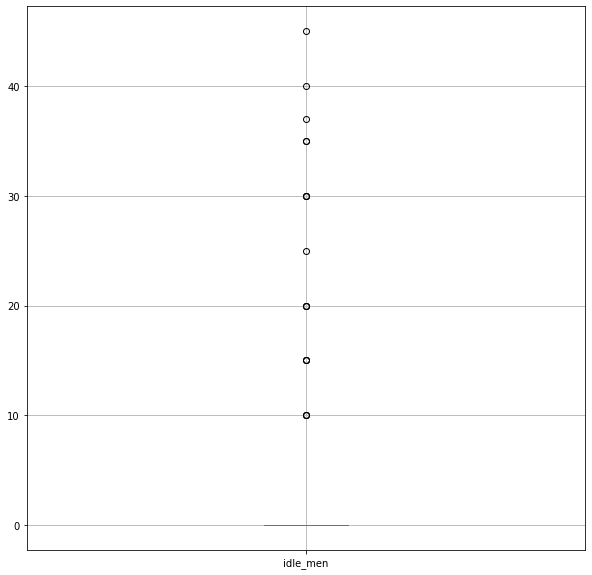

In [33]:
df_reg.boxplot(column=['idle_men'],figsize=(10,10))

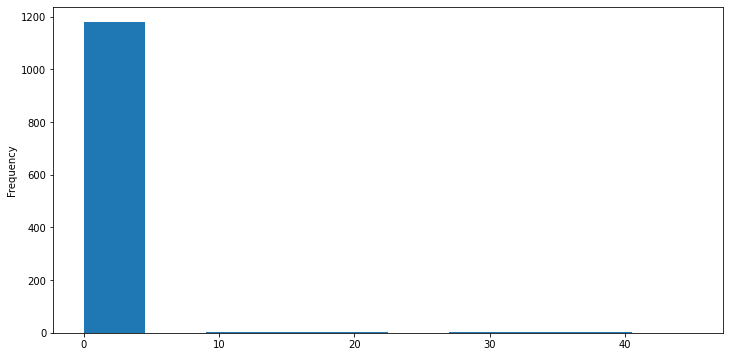

In [34]:
df_reg['idle_men'].plot(kind='hist')
plt.show()

Observation : Because of low idle time for most of the observations the frequency of number of idle 
men is higher between 0-5, however a few tasks might possess a large idle time so more workers might be idle
for those tasks.

# Feature 15 : 'actual_productivity'

The feature 'actual_productivity'represents the actual % of productivity that was delivered by the workers. It ranges from 0-1.

<AxesSubplot:>

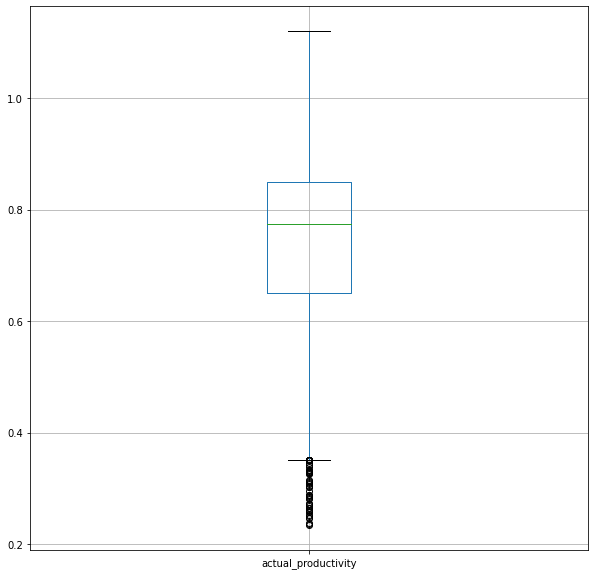

In [35]:
df_reg.boxplot(column=['actual_productivity'],figsize=(10,10))

Observation : Average actual productivity across the board is below 75% in contrast to average targeted productivity (more than 75%). Targeted prodcutivity tends to inflate more

# Performance Measure

In [36]:
df_reg_performance = df_reg.copy()

df_reg_performance['difference'] = df_reg.actual_productivity - df_reg.targeted_productivity
df_reg_performance.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'difference'],
      dtype='object')

In [37]:
df_reg_performance['Perform_label'] = np.nan
df_reg_performance.head()
df_reg_performance.loc[df_reg_performance['difference']<0,'Perform_label'] = -1
df_reg_performance.loc[(df_reg_performance['difference']==0), 'Perform_label'] = 0
df_reg_performance.loc[df_reg_performance['difference']>0, 'Perform_label'] = 1
df_reg_performance.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,difference,Perform_label
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1.0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500,1.0
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1.0


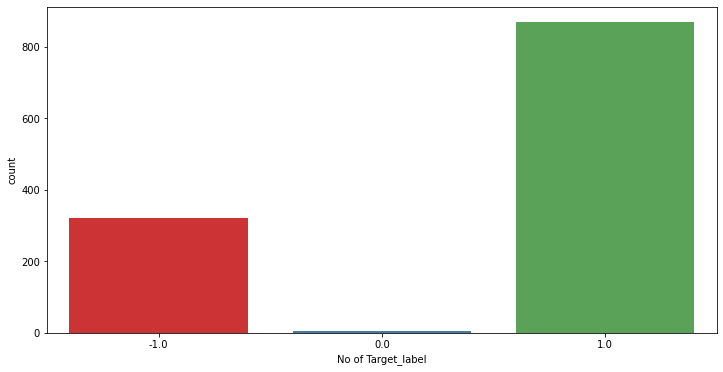

In [38]:
perform_label_plo = sns.countplot(x = 'Perform_label', data = df_reg_performance, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

So, there are more over-performance records than under-performed. It seems that expected productvity performance
is hardly forecasted correctly

# Parsing the missing values across multiple columns

In [39]:
df_reg.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

ONLY 'wip' feature seems to have missing values worth (506/(1196*15)) or 2.8%. So to adjust missing values we spread the missing values across other columns to make it 5-10% across the dataset

In [40]:
df_reg['department'].replace({'finishing ':np.nan}, inplace = True)
df_reg['quarter'].replace({'Quarter5':np.nan}, inplace = True)
df_reg['targeted_productivity'].replace({0.07:np.nan}, inplace = True)
df_reg['incentive'].replace({0:np.nan}, inplace = True)

In [41]:
df_reg.isnull().sum()

date                       0
quarter                   44
department               257
day                        0
team                       0
targeted_productivity      1
smv                        0
wip                      506
over_time                  0
incentive                604
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [42]:
percent_missing = df_reg.isnull().sum() * 100 / len(df_reg)
percent_missing

date                      0.000000
quarter                   3.675856
department               21.470343
day                       0.000000
team                      0.000000
targeted_productivity     0.083542
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                50.459482
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [43]:
missing_across_dataset = df_reg.isnull().sum().sum()/(len(df_reg)*15)
missing_across_dataset

0.07864104706209969

Now the missing value across the entire dataset becomes 7.8% which is acceptable in terms of project requirement

In [44]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1153 non-null   object 
 2   department             940 non-null    object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1196 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              593 non-null    float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# No of rows having at least 1 Missing value

In [45]:
sum([True for idx,row in df_reg.iterrows() if any(row.isnull())])

634

# Transforming a few data types 

In [46]:
#converting 'date' to datetime
df_reg['date'] = df_reg['date'].astype(np.datetime64)

#converting 'team' to object
df_reg['team'] = df_reg['team'].astype(str)

In [47]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1153 non-null   object        
 2   department             940 non-null    object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1196 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              593 non-null    float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

# Data Preparation and Imputation of Missing Values:

# Feature : 'quarter'

In [48]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', nan], dtype=object)

In [49]:
# finding the most frequent value in quarter column
quarter_mode = df_reg['quarter'].value_counts().idxmax()
#quarter_mode = df_reg['quarter'].value_counts()
quarter_mode

'Quarter1'

In [50]:
# imputing missing values with Quarter1
df_reg['quarter'].fillna(quarter_mode, inplace = True)

In [51]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

# Feature : 'department'

In [52]:
df_reg['department'].unique()

array(['sewing', nan, 'finishing'], dtype=object)

In [53]:
# Spelling correction : 'sweing' to 'sewing'
df_reg['department']=df_reg['department'].replace(['sweing'],['sewing'])

In [54]:
# finding the most frequent value in 'department' column
dept_mode = df_reg['department'].value_counts().idxmax()
#dept_mode = df_reg['department'].value_counts()
dept_mode

'sewing'

In [55]:
# imputing missing values with 'sewing'
df_reg['department'].fillna(dept_mode, inplace = True)

# Feature : 'wip'

In [56]:
df_reg['wip'].unique()

array([1.1080e+03,        nan, 9.6800e+02, 1.1700e+03, 9.8400e+02,
       7.9500e+02, 7.3300e+02, 6.8100e+02, 8.7200e+02, 5.7800e+02,
       6.6800e+02, 8.6100e+02, 7.7200e+02, 9.1300e+02, 1.2610e+03,
       8.4400e+02, 1.0050e+03, 6.5900e+02, 1.1520e+03, 1.1380e+03,
       6.1000e+02, 9.4400e+02, 5.4400e+02, 1.0720e+03, 5.3900e+02,
       1.2780e+03, 1.2270e+03, 1.0390e+03, 8.7800e+02, 1.0330e+03,
       7.8200e+02, 1.2160e+03, 5.1300e+02, 7.3400e+02, 1.2020e+03,
       8.8400e+02, 1.2550e+03, 1.0470e+03, 6.7800e+02, 7.1200e+02,
       1.0370e+03, 7.5700e+02, 7.5900e+02, 1.0830e+03, 6.6600e+02,
       1.1870e+03, 1.3050e+03, 7.1600e+02, 9.2500e+02, 9.6300e+02,
       1.1010e+03, 1.0350e+03, 9.1000e+02, 1.2090e+03, 5.9000e+02,
       8.0800e+02, 1.1790e+03, 1.3240e+03, 1.1350e+03, 7.7600e+02,
       9.9000e+02, 9.8600e+02, 9.2400e+02, 1.1200e+03, 1.0660e+03,
       1.1440e+03, 4.1300e+02, 5.6800e+02, 1.1890e+03, 9.4200e+02,
       1.0500e+03, 1.0260e+03, 7.8300e+02, 8.5700e+02, 5.4800e

<AxesSubplot:>

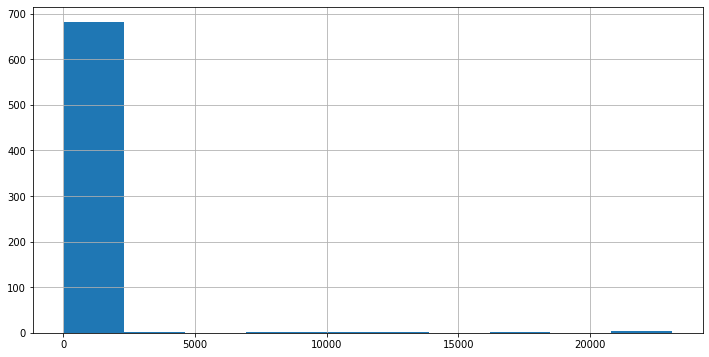

In [57]:
df_reg['wip'].hist()

'wip' has a skewed right distribution

In [58]:
med_wip = df_reg['wip'].median()
med_wip
df_reg['wip'].fillna(med_wip, inplace=True)

In [59]:
df_reg['wip'].unique()

array([1.1080e+03, 1.0390e+03, 9.6800e+02, 1.1700e+03, 9.8400e+02,
       7.9500e+02, 7.3300e+02, 6.8100e+02, 8.7200e+02, 5.7800e+02,
       6.6800e+02, 8.6100e+02, 7.7200e+02, 9.1300e+02, 1.2610e+03,
       8.4400e+02, 1.0050e+03, 6.5900e+02, 1.1520e+03, 1.1380e+03,
       6.1000e+02, 9.4400e+02, 5.4400e+02, 1.0720e+03, 5.3900e+02,
       1.2780e+03, 1.2270e+03, 8.7800e+02, 1.0330e+03, 7.8200e+02,
       1.2160e+03, 5.1300e+02, 7.3400e+02, 1.2020e+03, 8.8400e+02,
       1.2550e+03, 1.0470e+03, 6.7800e+02, 7.1200e+02, 1.0370e+03,
       7.5700e+02, 7.5900e+02, 1.0830e+03, 6.6600e+02, 1.1870e+03,
       1.3050e+03, 7.1600e+02, 9.2500e+02, 9.6300e+02, 1.1010e+03,
       1.0350e+03, 9.1000e+02, 1.2090e+03, 5.9000e+02, 8.0800e+02,
       1.1790e+03, 1.3240e+03, 1.1350e+03, 7.7600e+02, 9.9000e+02,
       9.8600e+02, 9.2400e+02, 1.1200e+03, 1.0660e+03, 1.1440e+03,
       4.1300e+02, 5.6800e+02, 1.1890e+03, 9.4200e+02, 1.0500e+03,
       1.0260e+03, 7.8300e+02, 8.5700e+02, 5.4800e+02, 4.1100e

# Feature : 'incentive'

In [60]:
df_reg['incentive'].unique()

array([  98.,   nan,   50.,   38.,   45.,   34.,   44.,   63.,   56.,
         40.,   60.,   26.,   75.,   23.,   35.,   69.,   88.,   30.,
         54.,   37.,   70.,   27.,   21.,   24.,   94.,   29.,   81.,
         55.,  119.,   90.,  113.,   46.,  100.,   53.,   93.,   49.,
        138.,   33.,   32.,   62.,   65.,  960., 1080., 2880., 3600.,
       1440., 1200.,   25.])

In [61]:
# finding the most frequent value in 'incentive' column
incnt_mode = df_reg['incentive'].value_counts().idxmax()
incnt_mode

50.0

In [62]:
df_reg['incentive'].fillna(incnt_mode, inplace=True)

In [63]:
df_reg['incentive'].unique()

array([  98.,   50.,   38.,   45.,   34.,   44.,   63.,   56.,   40.,
         60.,   26.,   75.,   23.,   35.,   69.,   88.,   30.,   54.,
         37.,   70.,   27.,   21.,   24.,   94.,   29.,   81.,   55.,
        119.,   90.,  113.,   46.,  100.,   53.,   93.,   49.,  138.,
         33.,   32.,   62.,   65.,  960., 1080., 2880., 3600., 1440.,
       1200.,   25.])

# Feature : 'targeted_productivity'

In [64]:
df_reg['targeted_productivity'].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 ,  nan, 0.4 ])

In [65]:
# finding the most frequent value in 'incentive' column
trgprd_mode = df_reg['targeted_productivity'].value_counts().idxmax()
trgprd_mode

0.8

In [66]:
df_reg['targeted_productivity'].fillna(trgprd_mode, inplace=True)

In [67]:
df_reg['targeted_productivity'].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.4 ])

# Feature Transformation

In [68]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [69]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [70]:
#'quarter' is a categorical nominal variables of 4 distinct values, so we replace it with a one-hot-vector of length 5
cols = pd.get_dummies(df_reg['quarter'])
df_reg[cols.columns] = cols
df_reg.drop('quarter', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   department             1197 non-null   object        
 2   day                    1197 non-null   object        
 3   team                   1197 non-null   object        
 4   targeted_productivity  1197 non-null   float64       
 5   smv                    1197 non-null   float64       
 6   wip                    1197 non-null   float64       
 7   over_time              1197 non-null   int64         
 8   incentive              1197 non-null   float64       
 9   idle_time              1197 non-null   float64       
 10  idle_men               1197 non-null   int64         
 11  no_of_style_change     1197 non-null   int64         
 12  no_of_workers          1197 non-null   float64       
 13  act

In [71]:
#converting Quarter1 - Quarter4 to object
df_reg['Quarter1'] = df_reg['Quarter1'].astype(str)
df_reg['Quarter2'] = df_reg['Quarter2'].astype(str)
df_reg['Quarter3'] = df_reg['Quarter3'].astype(str)
df_reg['Quarter4'] = df_reg['Quarter4'].astype(str)

In [72]:
df_reg['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [73]:
#'department' is a categorical nominal variables of 2 distinct values, so we replace it with a one-hot-vector of length 5
df_reg['department'] = df_reg['department'].astype(str)
cols = pd.get_dummies(df_reg['department'], prefix = 'dept')
df_reg[cols.columns] = cols
df_reg.drop('department', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   team                   1197 non-null   object        
 3   targeted_productivity  1197 non-null   float64       
 4   smv                    1197 non-null   float64       
 5   wip                    1197 non-null   float64       
 6   over_time              1197 non-null   int64         
 7   incentive              1197 non-null   float64       
 8   idle_time              1197 non-null   float64       
 9   idle_men               1197 non-null   int64         
 10  no_of_style_change     1197 non-null   int64         
 11  no_of_workers          1197 non-null   float64       
 12  actual_productivity    1197 non-null   float64       
 13  Qua

In [74]:
#converting 2 departments to object
df_reg['dept_finishing'] = df_reg['dept_finishing'].astype(str)
df_reg['dept_sewing'] = df_reg['dept_sewing'].astype(str)

In [75]:
df_reg.team.values

array(['8', '1', '11', ..., '7', '9', '6'], dtype=object)

In [76]:
#'team' is a categorical nominal variables of 12 distinct values , so we replace it with a one-hot vector of length 12
df_reg['team'] = df_reg['team'].astype(int)
cols = pd.get_dummies(df_reg['team'], prefix= 'team')
df_reg[cols.columns] = cols
df_reg.drop('team', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   float64       
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  Quarter1               1197 non-null   object        
 13  Qua

In [77]:
df_reg.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [78]:
#converting 12 teams to object
df_reg['team_1'] = df_reg['team_1'].astype(str)
df_reg['team_2'] = df_reg['team_2'].astype(str)
df_reg['team_3'] = df_reg['team_3'].astype(str)
df_reg['team_4'] = df_reg['team_4'].astype(str)
df_reg['team_5'] = df_reg['team_5'].astype(str)
df_reg['team_6'] = df_reg['team_6'].astype(str)
df_reg['team_7'] = df_reg['team_7'].astype(str)
df_reg['team_8'] = df_reg['team_8'].astype(str)
df_reg['team_9'] = df_reg['team_9'].astype(str)
df_reg['team_10'] = df_reg['team_10'].astype(str)
df_reg['team_11'] = df_reg['team_11'].astype(str)
df_reg['team_12'] = df_reg['team_12'].astype(str)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   float64       
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  Quarter1               1197 non-null   object        
 13  Qua

In [79]:
#'day' is a categorical nominal variable of 6 distinct values , so we replace it with a one-hot vector of length 6
cols = pd.get_dummies(df_reg['day'])
df_reg[cols.columns] = cols
df_reg.drop('day', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   targeted_productivity  1197 non-null   float64       
 2   smv                    1197 non-null   float64       
 3   wip                    1197 non-null   float64       
 4   over_time              1197 non-null   int64         
 5   incentive              1197 non-null   float64       
 6   idle_time              1197 non-null   float64       
 7   idle_men               1197 non-null   int64         
 8   no_of_style_change     1197 non-null   int64         
 9   no_of_workers          1197 non-null   float64       
 10  actual_productivity    1197 non-null   float64       
 11  Quarter1               1197 non-null   object        
 12  Quarter2               1197 non-null   object        
 13  Qua

In [80]:
#converting 6 days to object
df_reg['Monday'] = df_reg['Monday'].astype(str)
df_reg['Tuesday'] = df_reg['Tuesday'].astype(str)
df_reg['Wednesday'] = df_reg['Wednesday'].astype(str)
df_reg['Thursday'] = df_reg['Thursday'].astype(str)
df_reg['Saturday'] = df_reg['Saturday'].astype(str)
df_reg['Sunday'] = df_reg['Sunday'].astype(str)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   targeted_productivity  1197 non-null   float64       
 2   smv                    1197 non-null   float64       
 3   wip                    1197 non-null   float64       
 4   over_time              1197 non-null   int64         
 5   incentive              1197 non-null   float64       
 6   idle_time              1197 non-null   float64       
 7   idle_men               1197 non-null   int64         
 8   no_of_style_change     1197 non-null   int64         
 9   no_of_workers          1197 non-null   float64       
 10  actual_productivity    1197 non-null   float64       
 11  Quarter1               1197 non-null   object        
 12  Quarter2               1197 non-null   object        
 13  Qua

In [81]:
#df_reg["Date"] = pd.to_datetime(df_reg['date'])
#df_reg["year"] = df_reg["date"].dt.year
#df_reg["day"] = df_reg["date"].dt.day
#df_reg["month"] = df_reg["date"].dt.month

# Drop original columns Date
df_reg.drop('date', axis=1, inplace=True)
print (f"Feature names after data wrangling :\n\n {df_reg.columns}")

Feature names after data wrangling :

 Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'dept_finishing', 'dept_sewing', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


# Heat map Visualization on Correlation

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
sns.set_style("darkgrid")

<AxesSubplot:>

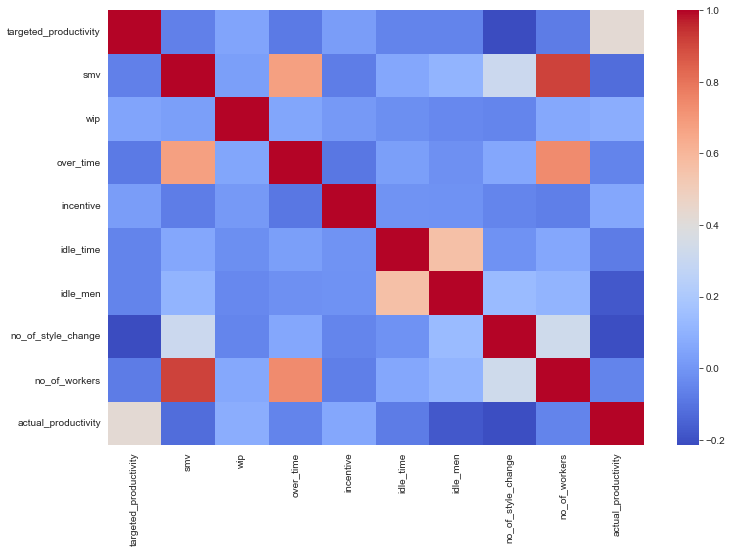

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(df_reg.corr(),cmap="coolwarm")

In [84]:
df_reg['no_of_workers'].corr(df_reg['smv'])

0.9121763124916776

In [85]:
df_reg['no_of_workers'].corr(df_reg['over_time'])

0.7341641744474343

In [86]:
df_reg['over_time'].corr(df_reg['smv'])

0.6748874395933928

In [87]:
df_reg['idle_men'].corr(df_reg['idle_time'])

0.5591459152184007

Highest Positive Correlations:

    No_of workers and smv (0.91)
    No_of workers and over_time (0.73)
    Over_time and smv (0.67)
    Idle_men and Idle_time (0.56)

    Positive Correlations:

    No_of workers and no_of_style_change(0.33)
    No_of_style_changehas and smv (0.32)
    There isnt any obvious negative correlation between features

In [88]:
# Let's check the correlation of features with target feature.
df_corr = df_reg.copy()
correlation_matrix = df_corr.corr()
# Interested only in the relation with target feature 'actual_productivity'
correlation_matrix=correlation_matrix['actual_productivity']
correlation_matrix=correlation_matrix.to_frame()
correlation_matrix.sort_values(by='actual_productivity',ascending=False,inplace=True)
display(correlation_matrix)

,actual_productivity
actual_productivity,1.000000
targeted_productivity,0.422013
wip,0.083545
incentive,0.057687
over_time,-0.054206
no_of_workers,-0.057991
idle_time,-0.080851
smv,-0.122089
idle_men,-0.181734
no_of_style_change,-0.207366


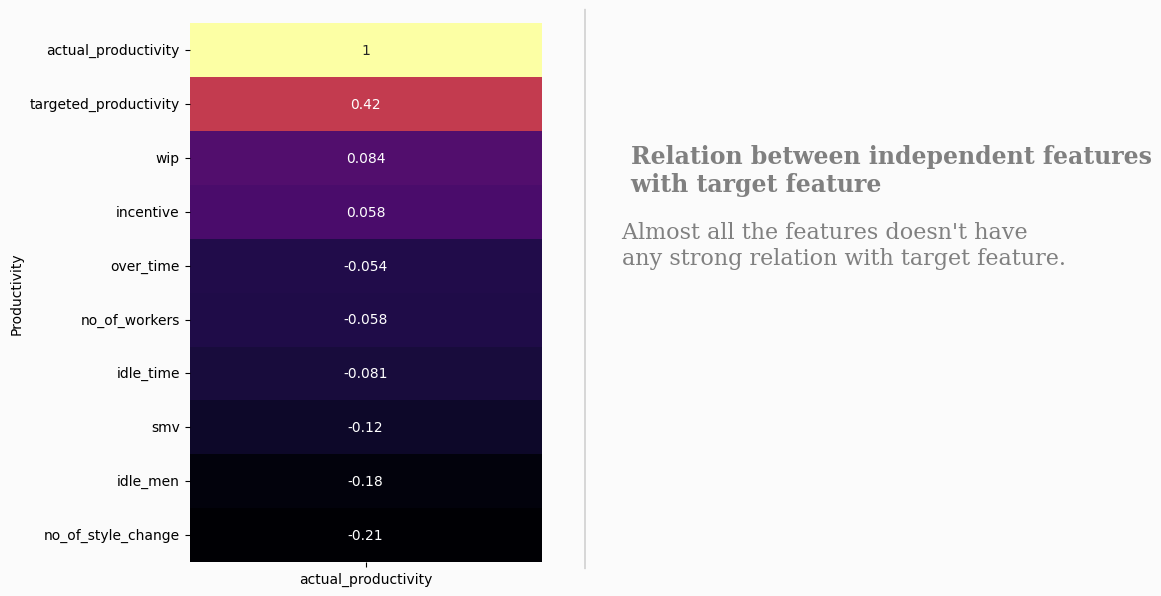

In [89]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

background_color='#fbfbfb'

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot 
sns.heatmap(correlation_matrix,cmap='inferno',annot=True,cbar=False,ax=ax0)
ax0.set_ylabel('Productivity')

   
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Relation between independent features
        with target feature
        ''')
#text content
fig.text(x=0.5,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Almost all the features doesn't have 
        any strong relation with target feature.
        ''')
plt.show()

# Splitting Dataset into Training and Testing set

In [90]:
X = df_reg.drop('actual_productivity',axis=1)   #Feature Matrix
y = df_reg["actual_productivity"]          #Target Variable

I am working on the regression dataset, so I am utilizing StandardScaler() method to scale the data.
Generally, for regression we scale using StandardScaler() because for most linear models  we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Besides, standardization maintains useful information about outliers and makes the algorithm less sensitive to them. As some of the features of this dataset have outliers
I considered using StandardScaler().

Also, please note that for regression analysis I have been using 'r2' as scornig method for the rest of the analysis and considering 5 folds cross validation in GridSearchCV().

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

# Training Regression Model

We are going to present following regression models:

>Apply any two models with bagging and any two models with pasting.
>Apply any two models with AdaBoost boosting.
>Apply gradient boosting.


1. Decision Tree Regressor with Bagging
2. SVR kernel 'rbf' with Bagging
3. Decision Tree Regressor with Pasting
4. SVR kernel 'liear' with Pasting

5. Decision Tree Regressor with AdaBoost
6. SVR kernel 'rbf' with Adaboost

7. Gradient Boosting
    
>Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results?

8. All 11 models from project 1 with post PCA data as follows :

    i. K Nearest Neighbors Regressor
    
    ii. Linear regression using the Normal Equation
    
    iii.  SGD Regressor
    
    iv.  Polynomial regression
    
    v.  Ridge
    
    vi.  LASSO
    
    vii.  LinearSVR
    
    viii.  SVR with kernel trick
        a. kernel='linear'
        b. kernel='rbf'
        c. kernel = 'poly’, degree
        
    ix. Decision Tree Regressor

>Apply deep learning models (MLP) covered in class.

9. Neural Network Model

# | Bagging |
1. SVR with kernel = 'rbf'

In [92]:
param_grid_SVR_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

params = {
    'bag__bootstrap_features' : [True, False],
    'bag__base_estimator__svc__kernel': ['linear', 'rbf'],
    'bag__base_estimator__svc__decision_function_shape': ['ovo', 'ovr']
}

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

param_grid_SVR_rbf = {'max_features':[0.1, 0.2, 0.5, 1], 
                     'n_estimators':[100, 200, 300, 500], 
                     'max_samples':[0.1, 0.5, 1]
                     }

svr_rbf = SVR(kernel = 'rbf')

# bagging: bootstrap = True
bag_svr = BaggingRegressor(svr_rbf, bootstrap = True, random_state = 0)

svr_rbf_grid = GridSearchCV(bag_svr, param_grid_SVR_rbf, cv = 5, scoring = 'r2', n_jobs = -1)

svr_rbf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=SVR(), random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2')

In [94]:
print("Best hyperparameter :", svr_rbf_grid.best_params_)
print("Best x-validation score :", svr_rbf_grid.best_score_)

Best hyperparameter : {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Best x-validation score : 0.26124186087345697


In [95]:
Full_table = [['SVR kernel RBF with Bagging: ', svr_rbf_grid.best_params_, svr_rbf_grid.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697]]

# | Bagging |

2. Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {'max_depth':[1, 2, 3, 4, 5],
                 'max_features':[0.1, 0.5, 1, 2],
                 'min_samples_leaf': [40, 60, 80, 100],
                 'min_samples_split': [100, 150, 200, 250, 300],
                 'n_estimators':[100, 200, 500]
                }

# bagging: bootstrap = True
rf_reg = RandomForestRegressor(bootstrap = True, n_jobs = -1, random_state = 0)

grid_rf = GridSearchCV(rf_reg, param_grid_rf, cv = 5, scoring= 'r2')

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.1, 0.5, 1, 2],
                         'min_samples_leaf': [40, 60, 80, 100],
                         'min_samples_split': [100, 150, 200, 250, 300],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [97]:
print("Best hyperparameter :", grid_rf.best_params_)
print("Best x-validation score :", grid_rf.best_score_)

Best hyperparameter : {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 500}
Best x-validation score : 0.3219499855033606


In [98]:
Full_table += [['Random Forest Regressor with Bagging: ', grid_rf.best_params_, grid_rf.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606]]

# Feature Importance in Random Forest Regressor with Bagging

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor_bag = RandomForestRegressor(max_depth = 5, 
                                 n_estimators = 500,
                                 bootstrap = True,
                                 max_features = 1,
                                 max_samples = 2,
                                 n_jobs = -1,
                                 random_state = 0)

rf_regressor_bag.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=1, max_samples=2,
                      n_estimators=500, n_jobs=-1, random_state=0)

([<matplotlib.axis.YTick at 0x7fcf1550fd00>,
 [Text(0, 0, 'targeted_productivity'),
  Text(0, 1, 'smv'),
  Text(0, 2, 'wip'),
  Text(0, 3, 'over_time'),
  Text(0, 4, 'incentive'),
  Text(0, 5, 'idle_time'),
  Text(0, 6, 'idle_men'),
  Text(0, 7, 'no_of_style_change'),
  Text(0, 8, 'no_of_workers'),
  Text(0, 9, 'Quarter1'),
  Text(0, 10, 'Quarter2'),
  Text(0, 11, 'Quarter3'),
  Text(0, 12, 'Quarter4'),
  Text(0, 13, 'dept_finishing'),
  Text(0, 14, 'dept_sewing'),
  Text(0, 15, 'team_1'),
  Text(0, 16, 'team_2'),
  Text(0, 17, 'team_3'),
  Text(0, 18, 'team_4'),
  Text(0, 19, 'team_5'),
  Text(0, 20, 'team_6'),
  Text(0, 21, 'team_7'),
  Text(0, 22, 'team_8'),
  Text(0, 23, 'team_9'),
  Text(0, 24, 'team_10'),
  Text(0, 25, 'team_11'),
  Text(0, 26, 'team_12'),
  Text(0, 27, 'Monday'),
  Text(0, 28, 'Saturday'),
  Text(0, 29, 'Sunday'),
  Text(0, 30, 'Thursday'),
  Text(0, 31, 'Tuesday'),
  Text(0, 32, 'Wednesday')])

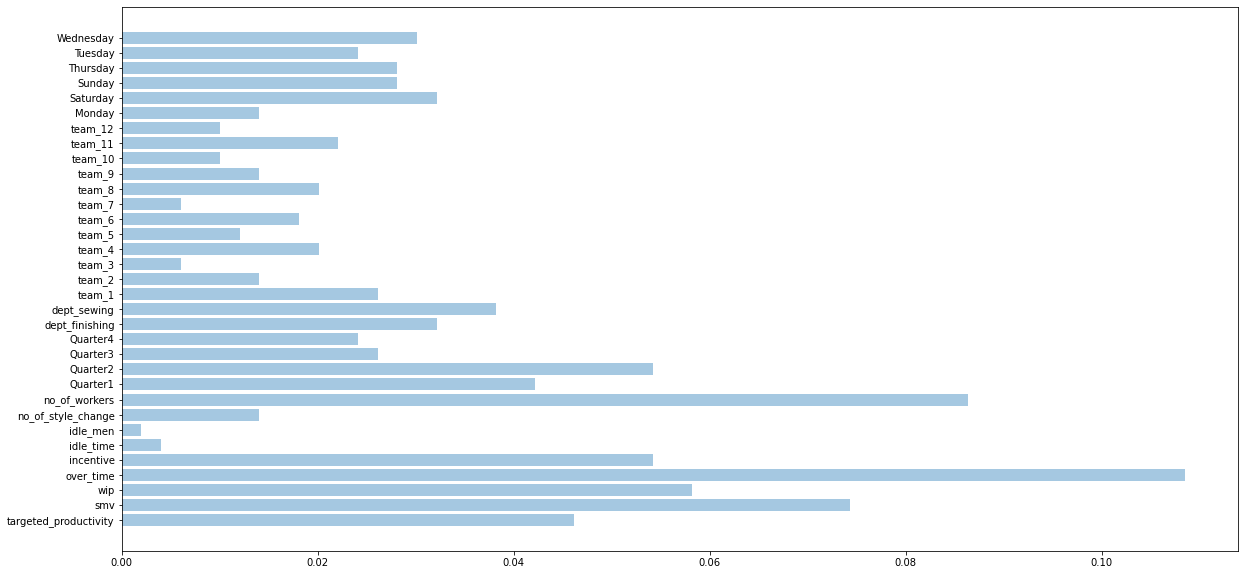

In [100]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = rf_regressor_bag.feature_importances_
y_pos = np.arange(len(y_list))
features = X
plt.barh(y_pos, y_list, align = 'center', alpha = 0.4)
plt.yticks(y_pos, features)

# 5 important features based on Random Forest Regressor with Bagging
    1. over_time
    2. no_of_workers
    3. smv
    4. wip
    5. incentive

# | Pasting |
1. Decision Tree Regressor

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

param_grid_dtreg = {'max_features':[0.1, 0.2, 0.5, 1], 
                    'n_estimators':[100, 200, 300, 500], 
                    'max_samples':[0.1, 0.5, 1]
                   }

dt_reg = DecisionTreeRegressor(random_state = 0)

# Pasting: bootstrap = False
pasting_dtreg = BaggingRegressor(dt_reg, bootstrap = False, random_state = 0)

dtreg_grid_pasting = GridSearchCV(pasting_dtreg, param_grid = param_grid_dtreg, cv = 5, n_jobs = -1, scoring = 'r2')
dtreg_grid_pasting.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2')

In [102]:
print("Best hyperparameter :", dtreg_grid_pasting.best_params_)
print("Best x-validation score :", dtreg_grid_pasting.best_score_)

Best hyperparameter : {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}
Best x-validation score : 0.4644404829042692


In [103]:
Full_table += [['Decision Tree Regressor with Pasting: ', dtreg_grid_pasting.best_params_, dtreg_grid_pasting.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606],
 ['Decision Tree Regressor with Pasting: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500},
  0.4644404829042692]]

# | Pasting |

2. Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {'max_depth':[1, 2, 3, 4, 5],
                 'max_features':[0.1, 0.5, 1, 2],
                 'min_samples_leaf': [40, 60, 80, 100],
                 'min_samples_split': [100, 150, 200, 250, 300],
                 'n_estimators':[100, 200, 500]
                }

# Pasting: bootstrap = False
pasting_rfreg = RandomForestRegressor(bootstrap = False, n_jobs = -1, random_state = 0)

grid_rf_pasting = GridSearchCV(pasting_rfreg, param_grid_rf, cv = 5, scoring= 'r2')

grid_rf_pasting.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, n_jobs=-1,
                                             random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.1, 0.5, 1, 2],
                         'min_samples_leaf': [40, 60, 80, 100],
                         'min_samples_split': [100, 150, 200, 250, 300],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [105]:
print("Best hyperparameter :", grid_rf_pasting.best_params_)
print("Best x-validation score :", grid_rf_pasting.best_score_)

Best hyperparameter : {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 200}
Best x-validation score : 0.3521877823686352


In [106]:
Full_table += [['Random Forest Regressor with Pasting: ', grid_rf_pasting.best_params_, grid_rf_pasting.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606],
 ['Decision Tree Regressor with Pasting: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500},
  0.4644404829042692],
 ['Random Forest Regressor with Pasting: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 200},
  0.3521877823686352]]

# Feature Importance in Random Forest Regressor with Pasting

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor_pasting = RandomForestRegressor(max_depth = 5, 
                                 n_estimators = 500,
                                 bootstrap = False,
                                 max_features = 1,
                                 max_samples = 2,
                                 n_jobs = -1,
                                 random_state = 0)

rf_regressor_pasting.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features=1,
                      max_samples=2, n_estimators=500, n_jobs=-1,
                      random_state=0)

([<matplotlib.axis.YTick at 0x7fcefcf5fc40>,
 [Text(0, 0, 'targeted_productivity'),
  Text(0, 1, 'smv'),
  Text(0, 2, 'wip'),
  Text(0, 3, 'over_time'),
  Text(0, 4, 'incentive'),
  Text(0, 5, 'idle_time'),
  Text(0, 6, 'idle_men'),
  Text(0, 7, 'no_of_style_change'),
  Text(0, 8, 'no_of_workers'),
  Text(0, 9, 'Quarter1'),
  Text(0, 10, 'Quarter2'),
  Text(0, 11, 'Quarter3'),
  Text(0, 12, 'Quarter4'),
  Text(0, 13, 'dept_finishing'),
  Text(0, 14, 'dept_sewing'),
  Text(0, 15, 'team_1'),
  Text(0, 16, 'team_2'),
  Text(0, 17, 'team_3'),
  Text(0, 18, 'team_4'),
  Text(0, 19, 'team_5'),
  Text(0, 20, 'team_6'),
  Text(0, 21, 'team_7'),
  Text(0, 22, 'team_8'),
  Text(0, 23, 'team_9'),
  Text(0, 24, 'team_10'),
  Text(0, 25, 'team_11'),
  Text(0, 26, 'team_12'),
  Text(0, 27, 'Monday'),
  Text(0, 28, 'Saturday'),
  Text(0, 29, 'Sunday'),
  Text(0, 30, 'Thursday'),
  Text(0, 31, 'Tuesday'),
  Text(0, 32, 'Wednesday')])

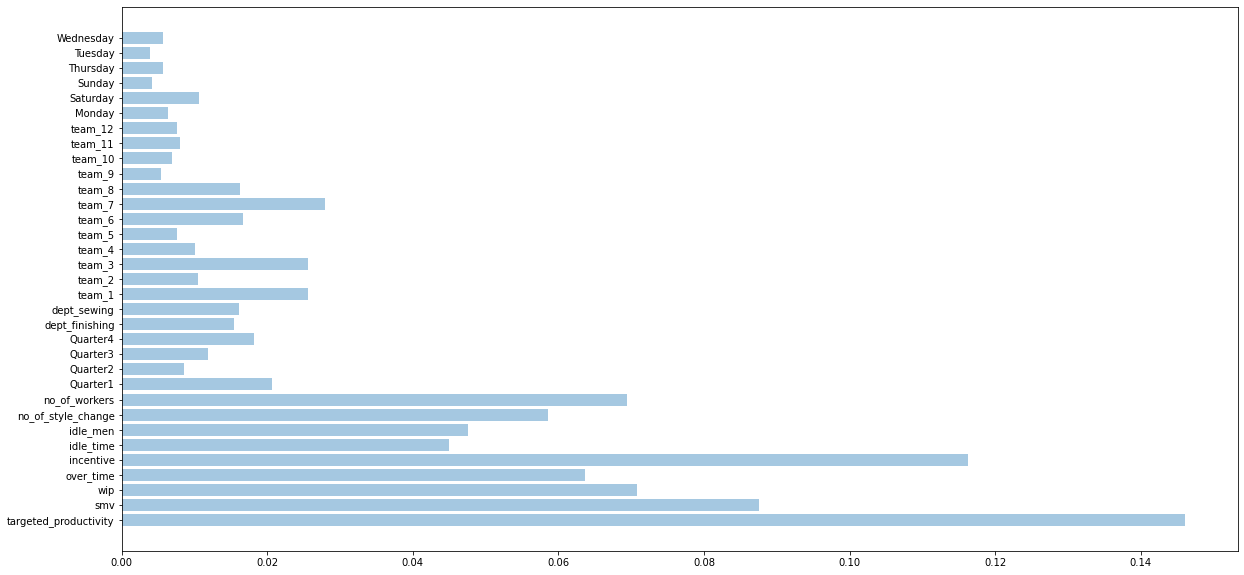

In [108]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = rf_regressor_pasting.feature_importances_
y_pos = np.arange(len(y_list))
features = X
plt.barh(y_pos, y_list, align = 'center', alpha = 0.4)
plt.yticks(y_pos, features)

# 6 important features based on Random Forest Regressor with Pasting
    
    1. targeted_productivity
    2. incentive
    3. smv
    4. wip
    5. no_of_workers
    6. over_time

# | AdaBoost Boosting |
1. Decision Tree Regressor

In [109]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid_adareg_dt = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                        'n_estimators':[100, 200, 500, 1000]
                       }

adareg_dt = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1, random_state = 0), random_state = 0)

adareg_dt_grid = GridSearchCV(adareg_dt, param_grid = param_grid_adareg_dt, cv = 5, n_jobs = -1)

adareg_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                                              random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'n_estimators': [100, 200, 500, 1000]})

In [110]:
print("Best hyperparameter :", adareg_dt_grid.best_params_)
print("Best x-validation score :", adareg_dt_grid.best_score_)

Best hyperparameter : {'learning_rate': 0.01, 'n_estimators': 500}
Best x-validation score : 0.1636572303640266


In [111]:
Full_table += [['AdaBoostRegressor with Decision Tree: ',adareg_dt_grid.best_params_, adareg_dt_grid.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606],
 ['Decision Tree Regressor with Pasting: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500},
  0.4644404829042692],
 ['Random Forest Regressor with Pasting: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 200},
  0.3521877823686352],
 ['AdaBoostRegressor with Decision Tree: ',
  {'learning_rate': 0.01, 'n_estimators': 500},
  0.1636572303640266]]

# | AdaBoost Boosting |

2. SVR with kernel = 'rbf'

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

param_grid_ada_SVR_rbf = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                        'n_estimators':[100, 200, 500, 1000]
                         }

svr_rbf = SVR(kernel = 'rbf')

ada_svr = AdaBoostRegressor(svr_rbf, random_state = 0)

adareg_svr_grid = GridSearchCV(ada_svr, param_grid = param_grid_ada_SVR_rbf, cv = 5, n_jobs = -1)

adareg_svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=SVR(), random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'n_estimators': [100, 200, 500, 1000]})

In [113]:
print("Best hyperparameter :", adareg_svr_grid.best_params_)
print("Best x-validation score :", adareg_svr_grid.best_score_)

Best hyperparameter : {'learning_rate': 0.001, 'n_estimators': 100}
Best x-validation score : 0.23703205644990918


In [114]:
Full_table += [['AdaBoostRegressor with SVR kernel rbf: ',adareg_svr_grid.best_params_, adareg_svr_grid.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606],
 ['Decision Tree Regressor with Pasting: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500},
  0.4644404829042692],
 ['Random Forest Regressor with Pasting: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 200},
  0.3521877823686352],
 ['AdaBoostRegressor with Decision Tree: ',
  {'learning_rate': 0.01, 'n_estimators': 500},
  0.1636572303640266],
 ['AdaBoostRegressor with SVR kernel rbf: ',
  {'learning_rate': 0.001, 'n_estimators': 100},
  0.23703205644990918]]

# | Gradient Boosting |

In [115]:
from  sklearn.ensemble import GradientBoostingRegressor

param_grid_gbreg = {'learning_rate':[0.001, 0.01, 0.1, 1],
                    'max_depth':[1, 2, 5], 
                    'n_estimators':[200, 500, 1000]
                   }

gb_reg = GradientBoostingRegressor(random_state = 0)

gbreg_grid = GridSearchCV(gb_reg, param_grid = param_grid_gbreg, cv = 5, scoring = 'r2', n_jobs = -1)
gbreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 5],
                         'n_estimators': [200, 500, 1000]},
             scoring='r2')

In [116]:
print("Best hyperparameter :", gbreg_grid.best_params_)
print("Best x-validation score :", gbreg_grid.best_score_)

Best hyperparameter : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best x-validation score : 0.4538094110744188


In [117]:
Full_table += [['Gradient Boosting Regressor: ',gbreg_grid.best_params_, gbreg_grid.best_score_]]
Full_table

[['SVR kernel RBF with Bagging: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  0.26124186087345697],
 ['Random Forest Regressor with Bagging: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 500},
  0.3219499855033606],
 ['Decision Tree Regressor with Pasting: ',
  {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500},
  0.4644404829042692],
 ['Random Forest Regressor with Pasting: ',
  {'max_depth': 5,
   'max_features': 0.5,
   'min_samples_leaf': 40,
   'min_samples_split': 100,
   'n_estimators': 200},
  0.3521877823686352],
 ['AdaBoostRegressor with Decision Tree: ',
  {'learning_rate': 0.01, 'n_estimators': 500},
  0.1636572303640266],
 ['AdaBoostRegressor with SVR kernel rbf: ',
  {'learning_rate': 0.001, 'n_estimators': 100},
  0.23703205644990918],
 ['Gradient Boosting Regressor: ',
  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200},
  0.4538094110744188]]

# Feature Importance in Gradient Boosting Regressor

In [118]:
from  sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 0.1, random_state = 0)
gbreg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=0)

([<matplotlib.axis.YTick at 0x7fcefa04a250>,
 [Text(0, 0, 'targeted_productivity'),
  Text(0, 1, 'smv'),
  Text(0, 2, 'wip'),
  Text(0, 3, 'over_time'),
  Text(0, 4, 'incentive'),
  Text(0, 5, 'idle_time'),
  Text(0, 6, 'idle_men'),
  Text(0, 7, 'no_of_style_change'),
  Text(0, 8, 'no_of_workers'),
  Text(0, 9, 'Quarter1'),
  Text(0, 10, 'Quarter2'),
  Text(0, 11, 'Quarter3'),
  Text(0, 12, 'Quarter4'),
  Text(0, 13, 'dept_finishing'),
  Text(0, 14, 'dept_sewing'),
  Text(0, 15, 'team_1'),
  Text(0, 16, 'team_2'),
  Text(0, 17, 'team_3'),
  Text(0, 18, 'team_4'),
  Text(0, 19, 'team_5'),
  Text(0, 20, 'team_6'),
  Text(0, 21, 'team_7'),
  Text(0, 22, 'team_8'),
  Text(0, 23, 'team_9'),
  Text(0, 24, 'team_10'),
  Text(0, 25, 'team_11'),
  Text(0, 26, 'team_12'),
  Text(0, 27, 'Monday'),
  Text(0, 28, 'Saturday'),
  Text(0, 29, 'Sunday'),
  Text(0, 30, 'Thursday'),
  Text(0, 31, 'Tuesday'),
  Text(0, 32, 'Wednesday')])

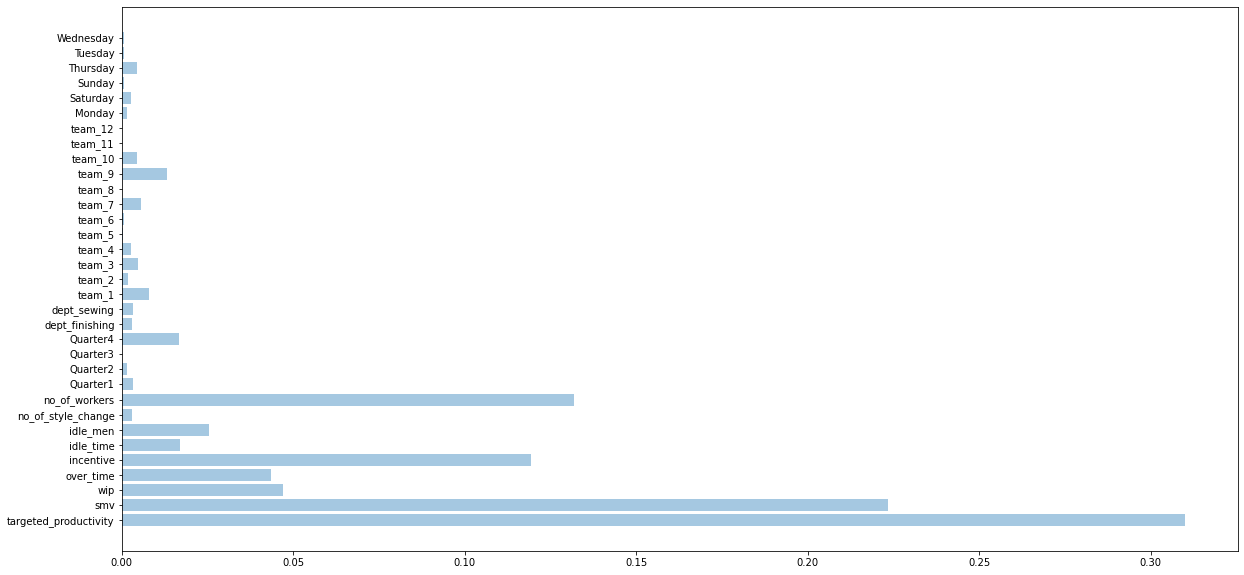

In [119]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = gbreg.feature_importances_
y_pos = np.arange(len(y_list))
features = X
plt.barh(y_pos, y_list, align = 'center', alpha = 0.4)
plt.yticks(y_pos, features)

# 4 important features based on Gradient Boosting Regressor
    1. targeted productivity
    2. smv
    3. no_of_workers
    4. incentive

# Summary of Models

Bagging Ensemble  |  Pasting Ensemble  |  AdaBoost Boosting  |  Gradient Boosting

In [120]:
pd.set_option("display.max_colwidth", -1)

print("\n\n ******************* @@@@@@@@@@@@@@@@@@@@ Model Performance Table @@@@@@@@@@@@@@@@@@@@ *******************\n")
Full_table1 = pd.DataFrame(Full_table, columns = ['Model', 'Best Hyperparameters', 'r2 score'])
#Full_table1.index = Full_table1['Model']
Full_table1.round(4)
Full_table1



 ******************* @@@@@@@@@@@@@@@@@@@@ Model Performance Table @@@@@@@@@@@@@@@@@@@@ *******************



/var/folders/rx/dq92bd594rd72ms3cbzf46cc0000gn/T/ipykernel_15205/1903144541.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Model,Best Hyperparameters,r2 score
0,SVR kernel RBF with Bagging:,"{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}",0.261242
1,Random Forest Regressor with Bagging:,"{'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 500}",0.321950
2,Decision Tree Regressor with Pasting:,"{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}",0.464440
3,Random Forest Regressor with Pasting:,"{'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 200}",0.352188
4,AdaBoostRegressor with Decision Tree:,"{'learning_rate': 0.01, 'n_estimators': 500}",0.163657
5,AdaBoostRegressor with SVR kernel rbf:,"{'learning_rate': 0.001, 'n_estimators': 100}",0.237032
6,Gradient Boosting Regressor:,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}",0.453809


# | Principal Component Analysis |

Apply PCA on data and then apply all the models in project 1 again on the post PCA data.
Compare your results with results in project 1. You do not need to apply all the models twice.
Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. 
Does PCA help in getting better results?

# Selecting the number of components

Cumulative Explained Variance Ratio vs Number Of Components

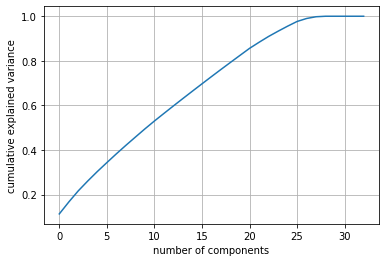

In [121]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The curve above quantifies how much of the total, 33 dimensional variance is contained within the first N components. For example, we see that with the X_train dataset the first 20 components contain approximately 85% of the variance, while we need around 25 components to describe close to 100% of the variance.
Here we see that we'd need about 23 components to retain 90% of the variance so we can see that reducing  the
dimensionality down to about 23 dimensions wouldn’t lose too much explained variance. So I would keep 90% as the explained variance for my calculation.

In [122]:
# reducing the dimensionality with 90% explained variance than any lower values
pca_reg = PCA(n_components = 0.90)
X_train_pca_reg = pca_reg.fit_transform(X_train)
X_test_pca_reg = pca_reg.transform(X_test)

Please note that, I have already used StandardScaler() to initially scale the data on which the PCA-transformation is applied because the data has to be normalized (i.e. to range between 0 and 1 before using PCA), meaning in this case:

1. zero mean
2. unit variance

As sklearn StandardScaler() provides such benefits, I retained the standardscaled data for PCA analysis in this case.

In [123]:
X_train.shape

(897, 33)

In [124]:
X_train_pca_reg.shape

(897, 23)

In [125]:
pca_reg.n_components_

23

In [126]:
pca_reg.explained_variance_ratio_.sum()

0.9092597544112335

In [127]:
pca_reg.explained_variance_ratio_

array([0.11341844, 0.05354644, 0.05009973, 0.0443009 , 0.04217149,
       0.03998796, 0.03937814, 0.03809174, 0.03700632, 0.03673052,
       0.03536226, 0.03400075, 0.03373133, 0.0333179 , 0.0329874 ,
       0.03269338, 0.03249191, 0.03213486, 0.03168094, 0.03148757,
       0.03129234, 0.02723067, 0.02611676])

In [128]:
#The dimensionality reduction error
1 - pca_reg.explained_variance_ratio_.sum()

0.09074024558876648

In [129]:
X_train_reconstruct = pca_reg.inverse_transform(X_train_pca_reg)
X_train_reconstruct

array([[ 0.19904511, -0.64032165, -0.44795405, ..., -0.52362694,
        -0.4833312 , -0.48559632],
       [ 0.39729723,  1.27107308,  0.13107038, ..., -0.37482868,
        -0.45176328,  2.04389273],
       [-0.06691086, -0.61253832, -0.22925934, ...,  2.11783229,
        -0.52753449, -0.50625388],
       ...,
       [ 0.30325006,  0.54563579, -0.01003511, ..., -0.53843826,
        -0.41660275,  2.34934396],
       [ 0.06652667,  0.94110721, -0.0292159 , ..., -0.51398261,
        -0.45853527, -0.46150904],
       [-0.42372334, -0.66827185,  0.27623224, ..., -0.35344449,
        -0.34335913, -0.38325281]])

In [130]:
X_test_reconstruct = pca_reg.inverse_transform(X_test_pca_reg)
X_test_reconstruct

array([[ 0.99780946,  0.01879477, -0.46273567, ..., -0.53377633,
         2.23814213, -0.42114529],
       [ 0.30195092, -0.89855713,  0.27648354, ...,  2.20588798,
        -0.40929288, -0.3888951 ],
       [ 0.94448377, -1.02951483,  0.69214635, ..., -0.3135669 ,
        -0.31977598, -0.40357023],
       ...,
       [ 0.04279198,  1.21222198,  0.24013092, ..., -0.39697359,
        -0.47239397,  2.08035896],
       [ 0.0197595 ,  1.19297681,  0.04358087, ..., -0.40770539,
        -0.4006437 , -0.59033945],
       [ 0.17070464,  0.09485315, -0.50056754, ..., -0.49607037,
         2.26445917, -0.39882522]])

# 1. K Neighbors Regressor with PCA

In [131]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21))
param_grid_KNR = dict(n_neighbors = k_range)

#sklearn.metrics.SCORERS.keys()
grid_knn_reg = GridSearchCV(knn_reg, param_grid_KNR, cv = 5, return_train_score = True, scoring = 'r2',n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_knn_reg.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='r2')

In [132]:
Full_table_PCA = [['knn Regressor with PCA: ', grid_knn_reg.best_params_, grid_knn_reg.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233]]

Text(0, 0.5, 'r2')

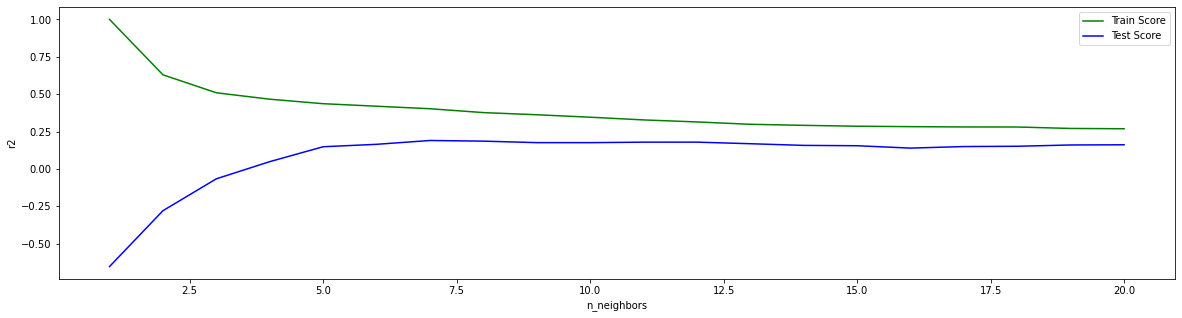

In [133]:
train_score_array = []
test_score_array = []
for k in k_range:
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
x_axis = k_range
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('r2')

# 2. Linear Regression using the Normal Equation

In [134]:
from sklearn.linear_model import LinearRegression

param_grid_LR = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

lin_reg = LinearRegression()

grid_lr = GridSearchCV(lin_reg, param_grid_LR, cv = 5, scoring= 'r2')

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_lr.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [135]:
Full_table_PCA += [['Linear Regressor with PCA: ', grid_lr.best_params_, grid_lr.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293]]

# 3. SGD Regressor

In [136]:
from sklearn.linear_model import SGDRegressor

param_grid_SGD = {'eta0': [0.001, 0.01, 0.1], 'max_iter' : [1000, 5000, 10000]}
sgd_reg = SGDRegressor(random_state = 0, learning_rate = 'constant', penalty = 'l2', shuffle = False)

grid_sgd = GridSearchCV(sgd_reg, param_grid_SGD, cv = 5, scoring= 'r2')

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_sgd.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5,
             estimator=SGDRegressor(learning_rate='constant', random_state=0,
                                    shuffle=False),
             param_grid={'eta0': [0.001, 0.01, 0.1],
                         'max_iter': [1000, 5000, 10000]},
             scoring='r2')

In [137]:
Full_table_PCA +=[['SGD Regressor with PCA: ', grid_sgd.best_params_, grid_sgd.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196]]

# 4. Polynomial Regression

In [138]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline

lambdas = [2,3,4]

best_score = -999 #because the score results are negative, so keeping -999
best_parameters = {}
for degree in lambdas:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train_pca_reg)
    X_test_poly = poly.transform(X_test_pca_reg)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
score = poly_reg.score(X_test_poly, y_test)
if score > best_score:
        best_score = score
        best_parameters = {'degree': degree}

In [139]:
Full_table_PCA += [['Polynomial Regression with PCA: ', best_parameters, best_score]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801]]

# 5. RIDGE

In [140]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()

param_grid_PolyReg = {'alpha' : [0.01, 0.1, 1, 10, 100]}

#sklearn.metrics.SCORERS.keys()
grid_ridge_reg = GridSearchCV(ridge_reg, param_grid_PolyReg, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_ridge_reg.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2')

In [141]:
Full_table_PCA += [['Ridge Regression with PCA: ', grid_ridge_reg.best_params_, grid_ridge_reg.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333]]

# 6. Lasso

In [142]:
from sklearn.linear_model import Lasso

lasso = Lasso()

param_grid_LASSO = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

#sklearn.metrics.SCORERS.keys()
grid_lasso = GridSearchCV(lasso, param_grid_LASSO, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_lasso.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2')

In [143]:
Full_table_PCA += [['Lasso Regression with PCA: ', grid_lasso.best_params_, grid_lasso.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854]]

[0.24323808518151313, 0.0, 0.0, 0.0, 0.0]
[0.265083691426238, -0.001456766113597352, -0.001456766113597352, -0.001456766113597352, -0.001456766113597352]


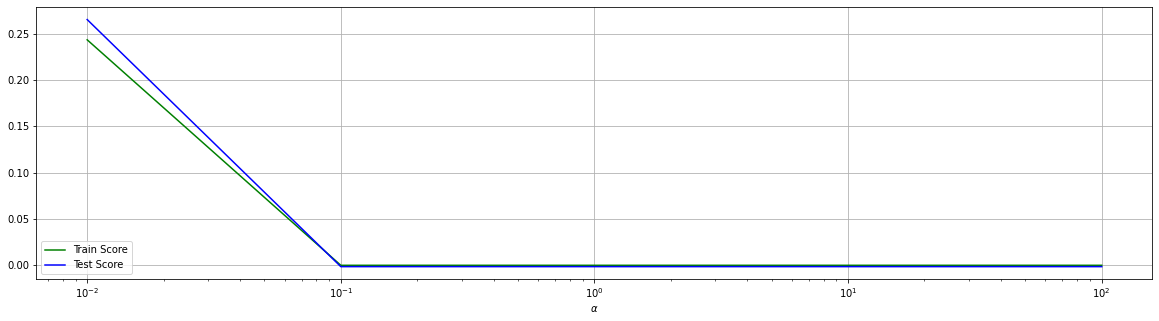

In [144]:
train_score_list = []
test_score_list = []
for alpha in [0.01, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    train_score_list.append(lasso.score(X_train, y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    x_range = [0.01, 0.1, 1, 10, 100]
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()
print(train_score_list)
print(test_score_list)

# 7. Linear SVR

In [145]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()

param_grid_LSVR = {'C':[0.001, 0.1, 1, 10, 100, 1000], 'epsilon':[0.001, 0.01, 0.1, 1], 'max_iter':[1000, 5000, 10000]}

#pred_svr = svr.predict(X_test)

grid_lsvr = GridSearchCV(lsvr, param_grid_LSVR, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_lsvr.fit(X_train_pca_reg, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'max_iter': [1000, 5000, 10000]},
             return_train_score=True, scoring='r2')

In [146]:
Full_table_PCA += [['Linear SVR with PCA: ', grid_lsvr.best_params_, grid_lsvr.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854],
 ['Linear SVR with PCA: ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.14921837708624133]]

# 8. SVR with kernel trick

# a. kernel = 'linear'

In [147]:
from sklearn.svm import SVR

svr_ker_lin = SVR(kernel = 'linear')

param_grid_SVR_ker_lin = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_svr_ker_lin = GridSearchCV(svr_ker_lin, param_grid_SVR_ker_lin, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_svr_ker_lin.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2')

In [148]:
Full_table_PCA += [['SVR kernel=linear with PCA: ', grid_svr_ker_lin.best_params_, grid_svr_ker_lin.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854],
 ['Linear SVR with PCA: ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.14921837708624133],
 ['SVR kernel=linear with PCA: ', {'C': 0.001}, 0.16444605187443856]]

# b. kernel = 'rbf'

In [149]:
from sklearn.svm import SVR

svr_ker_rbf = SVR(kernel = 'rbf')

param_grid_SVR_ker_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svr_ker_rbf = GridSearchCV(svr_ker_rbf, param_grid_SVR_ker_rbf, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_svr_ker_rbf.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2')

In [150]:
Full_table_PCA += [['SVR kernel rbf with PCA: ', grid_svr_ker_rbf.best_params_, grid_svr_ker_rbf.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854],
 ['Linear SVR with PCA: ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.14921837708624133],
 ['SVR kernel=linear with PCA: ', {'C': 0.001}, 0.16444605187443856],
 ['SVR kernel rbf with PCA: ', {'C': 1, 'gamma': 0.01}, 0.237668290910298]]

# c. kernel = 'poly' (with degree = 3)

In [151]:
from sklearn.svm import SVR

svr_ker_poly = SVR(kernel = 'poly', degree = 3)

param_grid_SVR_ker_poly = {'C': [0.01, 0.1, 1, 10, 100]}

grid_svr_ker_poly = GridSearchCV(svr_ker_poly, param_grid_SVR_ker_poly, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_svr_ker_poly.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='r2')

In [152]:
Full_table_PCA += [['SVR kernel poly with PCA: ', grid_svr_ker_poly.best_params_, grid_svr_ker_poly.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854],
 ['Linear SVR with PCA: ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.14921837708624133],
 ['SVR kernel=linear with PCA: ', {'C': 0.001}, 0.16444605187443856],
 ['SVR kernel rbf with PCA: ', {'C': 1, 'gamma': 0.01}, 0.237668290910298],
 ['SVR kernel poly with PCA: ', {'C': 1}, -0.24569821925696173]]

# 9. Decision Tree Regressor

In [153]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(random_state = 0)

param_grid_DTREG = {'max_depth': [1,2,3,4,5,6,7,8],'min_samples_leaf': [30,40,50,60,70,80,90,100],
                    'min_samples_split': [100,150,200,250,300]}


grid_dtreg = GridSearchCV(dtree_reg, param_grid_DTREG, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search with reduced dataset with 90% explained variance
grid_dtreg.fit(X_train_pca_reg, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_split': [100, 150, 200, 250, 300]},
             return_train_score=True, scoring='r2')

In [154]:
Full_table_PCA += [['Decision Tree Regressor with PCA: ', grid_dtreg.best_params_, grid_dtreg.best_score_]]
Full_table_PCA

[['knn Regressor with PCA: ', {'n_neighbors': 20}, 0.15333899967379233],
 ['Linear Regressor with PCA: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.15240226206246293],
 ['SGD Regressor with PCA: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.14604729871942196],
 ['Polynomial Regression with PCA: ', {'degree': 4}, -17.41152933103801],
 ['Ridge Regression with PCA: ', {'alpha': 100}, 0.16531848123525333],
 ['Lasso Regression with PCA: ', {'alpha': 0.001}, 0.15548058994699854],
 ['Linear SVR with PCA: ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.14921837708624133],
 ['SVR kernel=linear with PCA: ', {'C': 0.001}, 0.16444605187443856],
 ['SVR kernel rbf with PCA: ', {'C': 1, 'gamma': 0.01}, 0.237668290910298],
 ['SVR kernel poly with PCA: ', {'C': 1}, -0.24569821925696173],
 ['Decision Tree Regressor with PCA: ',
  {'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100},
  0.11414284780546932]]

# Summary of Models from Project 1



 ********************  @@@@@@@@@@@@@@@@@@  Result from Project 1  @@@@@@@@@@@@@@@@@@  ********************



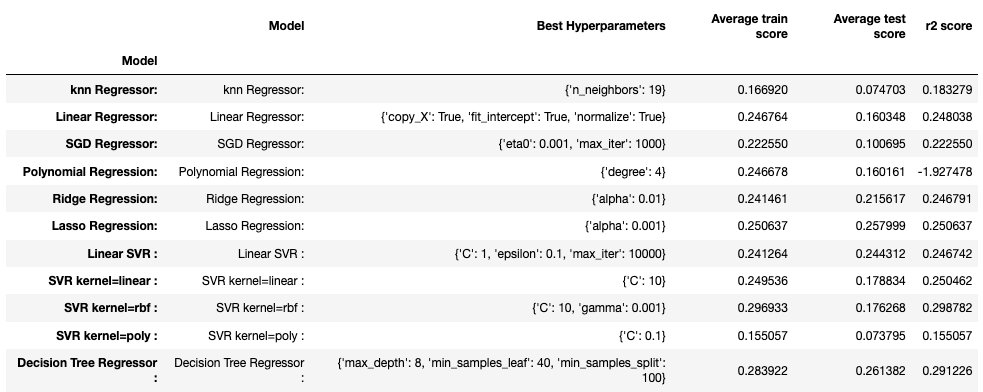

In [155]:
print("\n\n ********************  @@@@@@@@@@@@@@@@@@  Result from Project 1  @@@@@@@@@@@@@@@@@@  ********************\n")
from IPython.display import Image
Image(filename='Project1_Summary.jpg')

We got maximun r2_score: 0.2987 by using SVR with kernel = 'rbf' with hyperparamters {'C': 10, 'gamma': 0.001}. Hence this is the best model. Because the cross validation score is negative (-0.03) for the best model so far (SVR kernel=rbf) I picked the second best model i.e. Decision Tree Regressor and checked the cross validation score with 0.19 which is quite good for picking it as the final model of the project. So, Decision Tree with max_depth=8, min_samples_leaf=40, min_samples_split=100 is the final model that I am selecting across the board.

# Summary of Post PCA Model Performance 

In [156]:
pd.set_option("display.max_colwidth", -1)

print("\n\n ********************  @@@@@@@@@@ Post PCA Result  @@@@@@@@@@ ********************\n")
Full_table2 = pd.DataFrame(Full_table_PCA, columns = ['Model','Best Hyperparameters','r2 score'])
#Full_table1.index = Full_table1['Model']
Full_table2.round(4)
Full_table2



 ********************  @@@@@@@@@@ Post PCA Result  @@@@@@@@@@ ********************



/var/folders/rx/dq92bd594rd72ms3cbzf46cc0000gn/T/ipykernel_15205/3101399874.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Model,Best Hyperparameters,r2 score
0,knn Regressor with PCA:,{'n_neighbors': 20},0.153339
1,Linear Regressor with PCA:,"{'copy_X': True, 'fit_intercept': True, 'normalize': True}",0.152402
2,SGD Regressor with PCA:,"{'eta0': 0.001, 'max_iter': 1000}",0.146047
3,Polynomial Regression with PCA:,{'degree': 4},-17.411529
4,Ridge Regression with PCA:,{'alpha': 100},0.165318
5,Lasso Regression with PCA:,{'alpha': 0.001},0.155481
6,Linear SVR with PCA:,"{'C': 1, 'epsilon': 0.1, 'max_iter': 10000}",0.149218
7,SVR kernel=linear with PCA:,{'C': 0.001},0.164446
8,SVR kernel rbf with PCA:,"{'C': 1, 'gamma': 0.01}",0.237668
9,SVR kernel poly with PCA:,{'C': 1},-0.245698


# | Model Comparision with and without PCA |

1. kNN Regressor : For this regression model, model using PCA reduces the no of neighbors by 1. The r2 score did not improve for the model with PCA as compared to the model without PCA.

2. Linear Regressor : For this regression model also the model with PCA could not improve its iverall performance in terms of r2 scoring evaluation.

3. SGD Regressor : The performance of the model with PCA has improved about 3% with respect to that of without PCA with the exact same hyperparameter combination.

4. Polynomial Regression : The R2 score was negative for the model without PCA and it still remained negative for the model with PCA with degree 4 polynomial.

5. Ridge Regressor : The performance of this model did not improve with PCA as well even with higher value of alpha (100) than that without PCA.

6. Lasso Regressor : The r2 score significantly dropped for Lasso regression model in case of model with PCA applied than that without PCA. The alpha parameter remained the same for both (0.001)

7. Linear SVR : For this regression model, model using PCA did not exhibit any better with PCA than without PCA with the exact same combination of 'C', 'epsilon' and 'max_iter' parameters.

8. SVR with kernel 'linear' : The r2 score significanly dropped for this model with PCA than it was without PCA. However, the hypermparameter value of 'C' reduced a lot (10 to 0.001).

9. SVR with kernel 'rbf' : This model is the champion model with PCA however the r2 score dropped about 6%. For the model with PCA 'C' hyperparameter value reduced from 10 to 0.1 but it took a higher 'gamma' value than without PCA.

10. SVR with kernel 'poly' : The r2 score significanly dropped for the model with PCA than without PCA. Although it considered larger 'C' value than it did for without PCA.

11. Decision Tree Regressor : The r2 score of this model also significantky reduced with PCA which was the second best model without PCA. For 'max_depth' the model reduced the value with PCA but for 'min_samples_leaf' it increased and for 'min_samples_split' the value remained unchanged.

#### By comparing above two tables we can clearly see that r2 Score are lower for PCA processed data than scaled data (project 1 without PCA). PCA doesnt help getting better results in this case. However, we had obtained Decision Tree Regressor as the best model (28.4%) without using PCA and when we use PCA we get SVR with kernel 'rbf' as the best model (23.76%).

After initial feature transformation (with 33 features) all the 11 regression models from project 1 with gridsearch technique gave the best model as Decision Tree Regressor with the highest r2 score (~29%). The results however with the reduced dataset (with 23 features which is about 31% reduced features of the original dataset after feature transformation) after applying PCA with 90% explained variance showed a little drop in r2 score across the models. SVR kernel 'rbf' outperformed here with PCA post processed data and stood out as the best model with 24% r2 score.

# Deep Learning Alogorithm

# | Multi Layer Perceptron |

(MLP)

In [157]:
#!pip install tensorflow
#!pip install PyHamcrest

In [158]:
#from tensorflow.keras import backend
#backend.clear_session()

In [159]:
import tensorflow as tf
import tensorflow
import matplotlib.pyplot as plt

from tensorflow import keras

In [160]:
from keras import Sequential
from keras.layers import Dense

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings("ignore")

In [162]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility
tf.random.set_seed(0)

In [163]:
X_train.shape

(897, 33)

In [164]:
y_train.shape

(897,)

In [165]:
# step 1 : Building the Model
def create_model(): 
    mlp = Sequential()
    # Input Layer
    mlp.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu', name = 'input_layer'))
    # Hidden Layer
    mlp.add(Dense(16, activation = 'relu', name = 'hidden_layer1'))
    mlp.add(Dense(8, activation = 'relu', name = 'hidden_layer2'))
    # Output Layer
    mlp.add(Dense(1, name = 'output_layer')) # only one neuron and no activation function in output layer for regression

# step 2: Compilation of the Model - Building the Computational Graph
    mlp.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse', 'mae'])
    return mlp

In [166]:
from sklearn.model_selection import GridSearchCV

mlp_reg = KerasRegressor(build_fn = create_model, verbose = 0)

grid_mlp_param = {'batch_size':[5, 10],
                  'epochs':[10, 15, 20, 25]}

grid_mlp = GridSearchCV(estimator = mlp_reg, param_grid = grid_mlp_param, cv = 5, verbose = 3, scoring = 'r2')
grid_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


2021-11-21 13:53:56.418521: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[CV 1/5] END ..........batch_size=5, epochs=10;, score=-0.200 total time=   3.2s
[CV 2/5] END ..........batch_size=5, epochs=10;, score=-0.080 total time=   2.4s
[CV 3/5] END ..........batch_size=5, epochs=10;, score=-0.115 total time=   2.5s
[CV 4/5] END ...........batch_size=5, epochs=10;, score=0.041 total time=   2.5s
[CV 5/5] END ...........batch_size=5, epochs=10;, score=0.200 total time=   2.3s
[CV 1/5] END ..........batch_size=5, epochs=15;, score=-0.058 total time=   3.4s
[CV 2/5] END ..........batch_size=5, epochs=15;, score=-0.090 total time=   3.3s
[CV 3/5] END ..........batch_size=5, epochs=15;, score=-0.009 total time=   3.3s
[CV 4/5] END ...........batch_size=5, epochs=15;, score=0.065 total time=   3.2s
[CV 5/5] END ..........batch_size=5, epochs=15;, score=-0.032 total time=   3.4s
[CV 1/5] END ..........batch_size=5, epochs=20;, score=-0.042 total time=   4.3s
[CV 2/5] END ..........batch_size=5, epochs=20;, score=-0.105 total time=   4.3s
[CV 3/5] END ...........batc

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcefcf73070>,
             param_grid={'batch_size': [5, 10], 'epochs': [10, 15, 20, 25]},
             scoring='r2', verbose=3)

In [167]:
print("Best Score: {0:.4f}".format(grid_mlp.best_score_))
print("Parameters selected by best Keras Classifier model:", grid_mlp.best_estimator_)
print("Best parameters selected by best Keras Classifier model on reduced dataset:", grid_mlp.best_params_)

Best Score: 0.0287
Parameters selected by best Keras Classifier model: <keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcef437c3a0>
Best parameters selected by best Keras Classifier model on reduced dataset: {'batch_size': 5, 'epochs': 25}


In [168]:
mlp_log = pd.DataFrame(grid_mlp.cv_results_)
mlp_log.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.449222,0.297919,0.131329,0.023286,5,10,"{'batch_size': 5, 'epochs': 10}",-0.199858,-0.079547,-0.115208,0.041347,0.199846,-0.030684,0.138913,5
1,3.190582,0.073003,0.132791,0.025401,5,15,"{'batch_size': 5, 'epochs': 15}",-0.058118,-0.090111,-0.009380,0.064519,-0.031832,-0.024984,0.052231,3
2,4.257323,0.394579,0.126727,0.017251,5,20,"{'batch_size': 5, 'epochs': 20}",-0.042189,-0.104960,0.040974,-0.039565,0.102315,-0.008685,0.072294,2
3,5.783342,0.386520,0.129171,0.006886,5,25,"{'batch_size': 5, 'epochs': 25}",-0.020379,-0.049978,0.050258,0.156298,0.007320,0.028704,0.071836,1
4,1.436461,0.039609,0.104090,0.002777,10,10,"{'batch_size': 10, 'epochs': 10}",-0.160760,-0.318474,-0.465633,-0.106483,-0.038947,-0.218059,0.154395,8


<AxesSubplot:xlabel='param_epochs', ylabel='param_batch_size'>

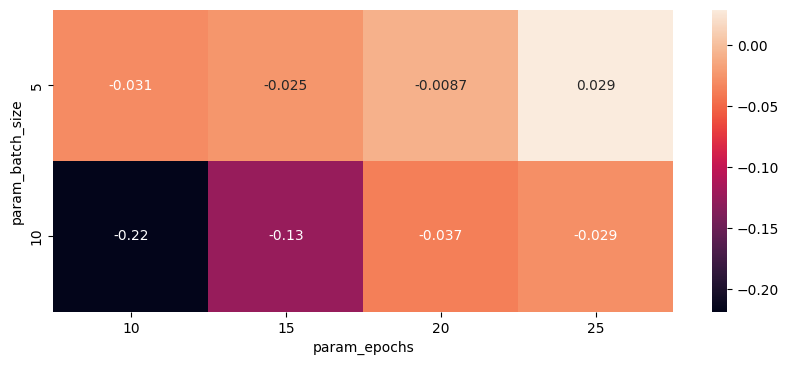

In [169]:
fig = plt.figure(figsize = (10,4),dpi = 100)
sns.heatmap(mlp_log.pivot_table(index = 'param_batch_size',
                                columns = 'param_epochs',
                                values = 'mean_test_score'),
                                annot = True)


# Best MLP Model

In [170]:
# step 1 : Building the Model
mlp_best = Sequential()
# Input Layer
mlp_best.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu', name = 'input_layer'))
# Hidden Layer
mlp_best.add(Dense(16, activation = 'relu', name = 'hidden_layer1'))
mlp_best.add(Dense(8, activation = 'relu', name = 'hidden_layer2'))
# Output Layer
mlp_best.add(Dense(1, name = 'output_layer')) # only one neuron and no activation function in output layer for regression

# step 2: Compilation of the Model - Building the Computational Graph
mlp_best.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse', 'mae'])

In [171]:
# step 3 : Training the Model
mlp_best.fit(X_train, y_train, epochs = 25, batch_size = 5, validation_data = (X_test, y_test))

Epoch 1/25
180/180 [==============================] - 1s 4ms/step - loss: 0.1097 - mse: 0.1097 - mae: 0.2426 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1578
Epoch 2/25
180/180 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0427 - mae: 0.1622 - val_loss: 0.0338 - val_mse: 0.0338 - val_mae: 0.1417
Epoch 3/25
180/180 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1490 - val_loss: 0.0306 - val_mse: 0.0306 - val_mae: 0.1347
Epoch 4/25
180/180 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1411 - val_loss: 0.0286 - val_mse: 0.0286 - val_mae: 0.1263
Epoch 5/25
180/180 [==============================] - 0s 2ms/step - loss: 0.0305 - mse: 0.0305 - mae: 0.1348 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1239
Epoch 6/25
180/180 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1311 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.1190
Epoch 7/25
180/1

In [172]:
mlp_output = pd.DataFrame(mlp_best.history.history)
mlp_output.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,0.109747,0.109747,0.242565,0.040634,0.040634,0.157754
1,0.042740,0.042740,0.162176,0.033757,0.033757,0.141719
2,0.036154,0.036154,0.149011,0.030623,0.030623,0.134657
3,0.032942,0.032942,0.141100,0.028611,0.028611,0.126341
4,0.030461,0.030461,0.134768,0.029897,0.029897,0.123851


In [173]:
# step 4: Evaluating the Model

train_loss_and_metrics = mlp_best.evaluate(X_train, y_train)
test_loss_and_metrics = mlp_best.evaluate(X_test, y_test)

print("Train mse", train_loss_and_metrics[1])
print("Train mae", train_loss_and_metrics[2])

print("Test mse", test_loss_and_metrics[1])
print("Test mae", test_loss_and_metrics[2])

10/10 [==============================] - 0s 3ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1152
Train mse 0.01999177783727646
Train mae 0.10842420905828476
Test mse 0.024374675005674362
Test mae 0.11519534140825272


In [174]:
y_pred = mlp_best.predict(X_test).reshape(-1,)
y_pred

array([0.8309197 , 0.8474195 , 1.0197064 , 0.7863159 , 0.56209826,
       0.8277876 , 0.7659368 , 0.787354  , 0.70765305, 0.73910403,
       0.8903545 , 0.77993387, 0.48407224, 0.7879314 , 0.5324166 ,
       0.6918428 , 0.72942936, 0.7477868 , 0.5504892 , 0.6877467 ,
       0.7032018 , 0.5785987 , 0.61476177, 0.73580265, 0.7627734 ,
       0.68390894, 0.76421857, 0.7182646 , 0.7352087 , 0.5623049 ,
       0.80930746, 0.79545224, 0.9175774 , 0.76021445, 0.7904164 ,
       0.7457669 , 0.7172077 , 0.6919676 , 0.733872  , 0.7640004 ,
       0.64420027, 0.57962185, 0.7140628 , 0.698118  , 0.78637797,
       0.6946113 , 0.9105525 , 0.697616  , 0.7991242 , 0.6843823 ,
       0.77494645, 0.8577459 , 0.738667  , 0.63624287, 0.77567184,
       0.68552977, 0.8772022 , 0.77786684, 0.7949275 , 0.6347623 ,
       0.8700986 , 0.73118603, 0.77267474, 0.82186234, 0.65430987,
       0.6556584 , 0.6220932 , 0.6599854 , 0.8088444 , 0.65435725,
       0.63010454, 0.62724316, 0.74677485, 0.7084073 , 0.52460

In [176]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.16209397842256412

# Project 2 in a nutshell
First of all, I have done an exploratory data analysis and initial cleansing of the data. parsing NAN into different features finally doing imputation across the features followed by the feature conversion to make the dataset all ready for the regression machine learning with bagging ensemble, pasting ensemble, Adaboost Bossting and Gradient Boosting. I have used SVR with kernel 'rbf' in bagging and AdaBoost Boosting, Random Forest Regressor in bagging, Decision Tree Regressor in Pasting and AdaBoost Boosting. I have included several machine learning regression models such as K neighbors Regressor, Linear Regression, Polynomial Regression, Ridge Regression, Lasso, Support Vector Machine Regressor both simple and with kernel trick ('linear', 'rbf' and 'poly'), Decision Tree Regressor with the reduced dataset (with 90% explained variance 23 features) after performing the principal component analysis. I have also utilized GridSearchCV() technique to find the best suited hyperparameter in each model using r2 scoring method over each and individual model to get a glimpse of how models are performing from one to another. Then I went ahead and performed a comparison analysis on the model evaluation based on Project 1 (sclad data without PCA) and those with PCA. Finally, I have analyzed Multi-layer Perceptron Neural Network with 2 hidden layers and fine tuned my model with the best hyper paramter combination found through grid search technique and predicted the target value on the test dataset.